In [373]:
# Importing and configuring essential data libraries for analysis.
# These settings allow us to view all columns and a large number of rows for better inspection.
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

IMPORTING DATASETS AND CLEANING

In [374]:
# Importing dataset 1 (Employer Plans) from CSV
df1 = pd.read_csv("/content/Employer Plans post-COVID WFH - Sheet1.csv")

# Cleaning column names: removing spaces, lowering case, replacing spaces with underscores
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ", "_")

# Keeping only rows where 'date' contains digits, then converting date column to datetime format
df1 = df1[df1['date'].astype(str).str.contains(r"\d")]
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# Identifying numeric and categorical columns separately
num_cols = df1.select_dtypes(include=[np.number]).columns
cat_cols = df1.select_dtypes(include=['object']).columns

# Removing rows that have all numeric values missing and dropping duplicates
df1 = df1.dropna(subset=num_cols, how='all').drop_duplicates()

# Filling missing numeric values with the median; filling categorical values with "Unknown"
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].median())
df1[cat_cols] = df1[cat_cols].fillna("Unknown")

#Displaying the cleaned dataset
df1.head()


,date,wfh_days_postcovid_planmad,wfh_days_postcovid_plan_emad,wfhcovid_fracmat_hmad,wfhcovid_fracmat_emad,license,citation,notes
1,2020-07-01,1.06,Unknown,1.45,2.34,Unknown,Unknown,Unknown
2,2020-08-01,1.06,1.58,2.40,3.25,Unknown,Unknown,Unknown
3,2020-09-01,1.09,1.56,2.27,3.12,Unknown,Unknown,Unknown
7,2021-01-01,1.06,1.58,1.80,2.67,Unknown,Unknown,Unknown
8,2021-02-01,1.12,1.69,1.76,2.62,Unknown,Unknown,Unknown


In [375]:
# Loading Dataset 2 and cleaning column names + date format
df2 = pd.read_csv("/content/Full Remote-Hybrid-Full Onsite - Sheet1.csv")

df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")
df2 = df2[df2['date'].astype(str).str.contains(r"\d")]
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')

# Handling missing values and removing duplicates
num_cols = df2.select_dtypes(include=[np.number]).columns
cat_cols = df2.select_dtypes(include=['object']).columns

df2 = df2.dropna(subset=num_cols, how='all').drop_duplicates()

# Filling missing numeric + categorical values
df2[num_cols] = df2[num_cols].fillna(df2[num_cols].median())
df2[cat_cols] = df2[cat_cols].fillna("Unknown")

df2.head()

,date,full_onsite_curr,hybrid_curr,full_remote_curr,full_onsite_curr_e,hybrid_curr_e,full_remote_curr_e,notes,license,citation
0,2021-11-01,54.4,30.4,15.3,30.9,45.3,23.8,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
1,2021-12-01,53.4,32.6,14.0,29.1,49.6,21.3,Unknown,Unknown,Unknown
2,2022-01-01,56.8,25.5,17.8,32.1,40.0,27.9,Unknown,Unknown,Unknown
3,2022-02-01,59.5,22.8,17.7,31.1,38.7,30.1,Unknown,Unknown,Unknown
4,2022-03-01,57.3,27.2,15.5,30.5,44.3,25.2,Unknown,Unknown,Unknown


In [376]:
# Loading Dataset 3 and standardizing column names + fixing date format
df3 = pd.read_csv("/content/LEGACY WFH series - Sheet1.csv")

df3.columns = df3.columns.str.strip().str.lower().str.replace(" ", "_")
df3 = df3[df3['date'].astype(str).str.contains(r"\d")]
df3['date'] = pd.to_datetime(df3['date'], errors='coerce')

# Removing rows with all missing numeric values and duplicates
num_cols = df3.select_dtypes(include=[np.number]).columns
cat_cols = df3.select_dtypes(include=['object']).columns

df3 = df3.dropna(subset=num_cols, how='all').drop_duplicates()

# Filling missing values for numeric and categorical columns
df3[num_cols] = df3[num_cols].fillna(df3[num_cols].median())
df3[cat_cols] = df3[cat_cols].fillna("Unknown")

df3.head()


,date,atus_wfhdays,wfhcovid,wfh_days_postcovid,notes,license,citation
0,2020-03-01,4.8,42.3,31.8,Pre-COVID value is authors' estimate using dat...,"Copyright 2024 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
1,2020-05-01,4.8,61.5,31.8,Unknown,Unknown,Unknown
2,2020-07-01,4.8,51.0,31.8,Unknown,Unknown,Unknown
3,2020-08-01,4.8,48.3,31.8,Unknown,Unknown,Unknown
4,2020-09-01,4.8,44.3,31.8,Unknown,Unknown,Unknown


In [377]:
df5 = pd.read_csv("/content/WFH 1965 - present - Sheet1.csv")

df5.columns = df5.columns.str.strip().str.lower().str.replace(" ", "_")
df5 = df5[df5['date'].astype(str).str.contains(r"\d")]
df5['date'] = pd.to_datetime(df5['date'], errors='coerce')

num_cols = df5.select_dtypes(include=[np.number]).columns
cat_cols = df5.select_dtypes(include=['object']).columns

df5 = df5.dropna(subset=num_cols, how='all').drop_duplicates()

df5[num_cols] = df5[num_cols].fillna(df5[num_cols].median())
df5[cat_cols] = df5[cat_cols].fillna("Unknown")

df5.head()


,date,wfh_share,source_historical_series,fullremote_hist,source_fullremote_hist,notes,license,citation
0,1965-01-01,0.4,AHTUS,3.0,Unknown,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
1,1975-01-01,0.6,AHTUS,3.0,Unknown,Unknown,Unknown,Unknown
2,1993-01-01,2.5,AHTUS,3.0,Unknown,Unknown,Unknown,Unknown
3,1995-01-01,2.2,AHTUS,3.0,Unknown,Unknown,Unknown,Unknown
4,1998-01-01,2.9,AHTUS,3.0,Unknown,Unknown,Unknown,Unknown


In [378]:
df6 = pd.read_csv("/content/WFH by city - Sheet1.csv")

df6.columns = df6.columns.str.strip().str.lower().str.replace(" ", "_")
df6 = df6[df6['date'].astype(str).str.contains(r"\d")]
df6['date'] = pd.to_datetime(df6['date'], errors='coerce')

num_cols = df6.select_dtypes(include=[np.number]).columns
cat_cols = df6.select_dtypes(include=['object']).columns

df6 = df6.dropna(subset=num_cols, how='all').drop_duplicates()

df6[num_cols] = df6[num_cols].fillna(df6[num_cols].median())
df6[cat_cols] = df6[cat_cols].fillna("Unknown")

df6.head()


,date,wfhcovid_series_top10_ma6_,wfhcovid_series_11to50_ma6_,wfhcovid_series_other_ma6_,wfhcovid_series_ma6_atlanta,wfhcovid_series_ma6_bayarea,wfhcovid_series_ma6_chicagoland,wfhcovid_series_ma6_dc,wfhcovid_series_ma6_dallas,wfhcovid_series_ma6_houston,wfhcovid_series_ma6_losangeles,wfhcovid_series_ma6_miami,wfhcovid_series_ma6_newyork,notes,license,citation
0,2020-10-01,51.1,44.0,42.3,98.1,98.9,78.8,91.9,98.2,87.8,100.9,91.7,98.5,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
1,2020-11-01,42.2,37.1,33.5,44.7,43.5,36.6,38.2,43.1,38.2,46.2,38.8,45.6,Change in survey question after Oct20,Unknown,Unknown
2,2020-12-01,41.7,35.8,32.8,44.0,41.2,34.6,39.1,41.7,37.7,44.9,39.1,45.6,Unknown,Unknown,Unknown
3,2021-01-01,40.1,34.8,32.2,43.1,41.2,32.1,39.3,39.8,37.7,44.2,39.0,44.2,Unknown,Unknown,Unknown
4,2021-02-01,40.6,35.4,32.3,43.4,40.5,32.8,40.0,39.5,37.6,43.8,38.6,44.1,Unknown,Unknown,Unknown


In [379]:
df7 = pd.read_csv("/content/WFH Rates by Industry - Sheet1.csv")

df7.columns = df7.columns.str.strip().str.lower().str.replace(" ", "_")
df7 = df7[df7['date'].astype(str).str.contains(r"\d")]
df7['date'] = pd.to_datetime(df7['date'], errors='coerce')

num_cols = df7.select_dtypes(include=[np.number]).columns
cat_cols = df7.select_dtypes(include=['object']).columns

df7 = df7.dropna(subset=num_cols, how='all').drop_duplicates()

df7[num_cols] = df7[num_cols].fillna(df7[num_cols].median())
df7[cat_cols] = df7[cat_cols].fillna("Unknown")

df7.head()


,date,wfh_fracmat_arts_entertain,wfh_fracmat_education,wfh_fracmat_finance_insurance,wfh_fracmat_government,wfh_fracmat_healthcare,wfh_fracmat_hospitaility_food,wfh_fracmat_information,wfh_fracmat_manufacturing,wfh_fracmat_prof_bus_services,wfh_fracmat_realestate,wfh_fracmat_retail,wfh_fracmat_transp_warehousing,wfh_fracmat_utilities,wfh_fracmat_wholesale,license,citation,notes
0,2022-01-01,34.9,24.4,44.8,26.9,26.0,11.8,48.43,17.45,40.47,35.52,15.06,13.19,28.32,37.41,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo...",Unknown
1,2023-01-01,35.7,21.7,43.1,24.1,25.2,11.2,45.34,16.15,39.16,26.09,14.00,13.28,28.18,26.44,Unknown,Unknown,Unknown
2,2024-01-01,32.5,19.5,44.9,26.8,25.7,10.2,44.72,16.15,38.99,33.66,13.46,13.25,31.45,30.15,Unknown,Unknown,Unknown
3,2025-01-01,33.6,18.9,44.4,24.8,25.0,11.1,43.08,14.95,37.93,30.56,14.43,12.67,31.51,30.70,Unknown,Unknown,Data for most recent year averages across mont...


In [380]:
df8 = pd.read_csv("/content/WFH Rates for Women & Men - Sheet1.csv")

df8.columns = df8.columns.str.strip().str.lower().str.replace(" ", "_")
df8 = df8[df8['date'].astype(str).str.contains(r"\d")]
df8['date'] = pd.to_datetime(df8['date'], errors='coerce')

num_cols = df8.select_dtypes(include=[np.number]).columns
cat_cols = df8.select_dtypes(include=['object']).columns

df8 = df8.dropna(subset=num_cols, how='all').drop_duplicates()

df8[num_cols] = df8[num_cols].fillna(df8[num_cols].median())
df8[cat_cols] = df8[cat_cols].fillna("Unknown")

df8.head()


,date,wfhcovid_fracmat_women,wfhcovid_fracmat_men,license,citation,notes
0,2020-05-01,64.66,59.58,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo...",Unknown
1,2020-07-01,51.69,50.59,Unknown,Unknown,Unknown
2,2020-08-01,50.32,46.96,Unknown,Unknown,Unknown
3,2020-09-01,44.41,44.33,Unknown,Unknown,Unknown
4,2020-10-01,47.20,40.82,Unknown,Unknown,Unknown


In [381]:
df9 = pd.read_csv("/content/WFH_WFO_dataset.csv")

df9.columns = df9.columns.str.strip().str.lower().str.replace(" ", "_")
df9 = df9.drop_duplicates()

num_cols = df9.select_dtypes(include=[np.number]).columns
cat_cols = df9.select_dtypes(include=['object']).columns

df9[num_cols] = df9[num_cols].fillna(df9[num_cols].median())
df9[cat_cols] = df9[cat_cols].fillna("Unknown")

df9.head()


,id,name,age,occupation,gender,same_ofiice_home_location,kids,rm_save_money,rm_quality_time,rm_better_sleep,calmer_stressed,rm_professional_growth,rm_lazy,rm_productive,digital_connect_sufficient,rm_better_work_life_balance,rm_improved_skillset,rm_job_opportunities,target
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [382]:
df10 = pd.read_csv("/content/WFHtimeseries_monthly dataset  - Sheet1.csv")

df10.columns = df10.columns.str.strip().str.lower().str.replace(" ", "_")
df10 = df10[df10['date'].astype(str).str.contains(r"\d")]
df10['date'] = pd.to_datetime(df10['date'], errors='coerce')

num_cols = df10.select_dtypes(include=[np.number]).columns
cat_cols = df10.select_dtypes(include=['object']).columns

df10 = df10.dropna(subset=num_cols, how='all').drop_duplicates()

df10[num_cols] = df10[num_cols].fillna(df10[num_cols].median())
df10[cat_cols] = df10[cat_cols].fillna("Unknown")

df10.head()


,date,wfhcovid_matquestion,wfhcovid_frac_hps,notes,license,citation
0,2020-03-01,7.2,29.1,Pre-COVID value is Authors' estimate using dat...,Unknown,Unknown
1,2020-05-01,61.6,29.1,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
2,2020-06-01,56.4,29.1,The SWAA June 2020 estimate is averages the Ma...,Unknown,Unknown
3,2020-07-01,51.2,29.1,Unknown,Unknown,Unknown
4,2020-08-01,48.4,29.1,Unknown,Unknown,Unknown


In [383]:
df11 = pd.read_csv("/content/Work Arrangements by Industry - Sheet1.csv")

df11.columns = df11.columns.str.strip().str.lower().str.replace(" ", "_")
df11 = df11[df11['date'].astype(str).str.contains(r"\d")]
df11['date'] = pd.to_datetime(df11['date'], errors='coerce')

num_cols = df11.select_dtypes(include=[np.number]).columns
cat_cols = df11.select_dtypes(include=['object']).columns

df11 = df11.dropna(subset=num_cols, how='all').drop_duplicates()

df11[num_cols] = df11[num_cols].fillna(df11[num_cols].median())
df11[cat_cols] = df11[cat_cols].fillna("Unknown")

df11.head()


,date,full_onsite_arts_entertain,full_onsite_education,full_onsite_finance_insurance,full_onsite_government,full_onsite_healthcare,full_onsite_hospitaility_food,full_onsite_information,full_onsite_manufacturing,full_onsite_prof_bus_services,full_onsite_realestate,full_onsite_retail,full_onsite_transp_warehousing,full_onsite_utilities,full_onsite_wholesale,hybrid_arts_entertain,hybrid_education,hybrid_finance_insurance,hybrid_government,hybrid_healthcare,hybrid_hospitaility_food,hybrid_information,hybrid_manufacturing,hybrid_prof_bus_services,hybrid_realestate,hybrid_retail,hybrid_transp_warehousing,hybrid_utilities,hybrid_wholesale,full_remote_arts_entertain,full_remote_education,full_remote_finance_insurance,full_remote_government,full_remote_healthcare,full_remote_hospitaility_food,full_remote_information,full_remote_manufacturing,full_remote_prof_bus_services,full_remote_realestate,full_remote_retail,full_remote_transp_warehousing,full_remote_utilities,full_remote_wholesale,notes,license,citation
2,2022-01-01,31.4,61.3,25.8,62.2,56.9,78.6,29.5,71.1,34.2,39.3,75.1,77.9,55.4,58.3,44.6,25.2,44.5,19.6,25.3,15.7,47.7,20.8,30.4,38.2,15.6,15.2,30.4,22.3,24.0,13.4,29.7,18.2,17.9,5.7,22.8,8.1,35.3,22.5,9.4,6.9,14.2,19.4,Unknown,Unknown,Unknown
3,2022-02-01,41.0,61.9,28.8,61.1,60.9,79.8,24.1,72.7,33.7,38.8,75.6,75.7,63.5,53.8,35.3,25.2,42.4,19.9,20.5,15.1,48.6,18.1,29.7,39.1,14.6,16.9,24.1,21.1,23.7,12.9,28.7,19.1,18.6,5.1,27.3,9.3,36.6,22.1,9.8,7.4,12.3,25.1,Unknown,Unknown,Unknown
4,2022-03-01,36.8,64.8,29.3,62.4,60.6,79.2,22.2,74.3,37.8,41.0,75.6,78.3,68.0,42.3,39.7,25.2,45.8,21.3,21.2,16.0,48.8,17.2,29.9,37.3,15.4,14.5,27.1,31.8,23.5,9.9,24.9,16.3,18.2,4.8,29.0,8.5,32.2,21.7,9.0,7.2,4.9,25.9,Unknown,Unknown,Unknown
5,2022-04-01,38.6,64.1,28.1,65.2,60.4,79.5,20.2,73.4,39.3,47.2,73.4,73.9,63.5,46.8,37.7,25.7,48.2,21.2,24.2,17.6,53.7,19.7,33.4,39.9,17.0,19.9,29.2,28.0,23.8,10.1,23.7,13.5,15.4,2.9,26.1,6.9,27.3,12.9,9.6,6.2,7.3,25.3,Unknown,Unknown,Unknown
6,2022-05-01,43.5,58.4,28.0,61.1,57.9,80.1,22.4,73.0,38.3,44.7,72.8,76.7,51.4,55.0,37.0,32.0,50.6,22.3,26.1,17.0,52.8,20.6,36.9,44.1,18.6,18.0,37.1,25.2,19.5,9.6,21.4,16.6,16.0,2.9,24.7,6.4,24.8,11.2,8.6,5.3,11.5,19.8,Unknown,Unknown,Unknown


In [384]:
df12 = pd.read_csv("/content/Workday-weighted WFH series - Sheet1.csv")

df12.columns = df12.columns.str.strip().str.lower().str.replace(" ", "_")
df12 = df12[df12['date'].astype(str).str.contains(r"\d")]
df12['date'] = pd.to_datetime(df12['date'], errors='coerce')

num_cols = df12.select_dtypes(include=[np.number]).columns
cat_cols = df12.select_dtypes(include=['object']).columns

df12 = df12.dropna(subset=num_cols, how='all').drop_duplicates()

df12[num_cols] = df12[num_cols].fillna(df12[num_cols].median())
df12[cat_cols] = df12[cat_cols].fillna("Unknown")

df12.head()


,date,wfhcovid_matquestion_daywt,notes,license,citation
0,2020-05-01,61.6,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
1,2020-06-01,56.4,The SWAA June 2020 estimate is averages the Ma...,Unknown,Unknown
2,2020-07-01,51.2,Unknown,Unknown,Unknown
3,2020-08-01,48.4,Unknown,Unknown,Unknown
4,2020-09-01,44.4,Unknown,Unknown,Unknown


In [385]:
df13 = pd.read_csv("/content/Worker Desires post-COVID WFH - Sheet1.csv")

df13.columns = df13.columns.str.strip().str.lower().str.replace(" ", "_")
df13 = df13[df13['date'].astype(str).str.contains(r"\d")]
df13['date'] = pd.to_datetime(df13['date'], errors='coerce')

num_cols = df13.select_dtypes(include=[np.number]).columns
cat_cols = df13.select_dtypes(include=['object']).columns

df13 = df13.dropna(subset=num_cols, how='all').drop_duplicates()

df13[num_cols] = df13[num_cols].fillna(df13[num_cols].median())
df13[cat_cols] = df13[cat_cols].fillna("Unknown")

df13.head()


,date,wfh_days_postcovid_desmad,wfh_days_postcovid_des_emad,wfhcovid_fracmat_hmad,wfhcovid_fracmat_emad,license,citation,notes
0,2020-05-01,2.09,Unknown,1.45,2.34,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo...",Unknown
1,2020-07-01,2.10,Unknown,1.45,2.34,Unknown,Unknown,Unknown
2,2020-08-01,2.17,2.58,2.40,3.25,Unknown,Unknown,Unknown
3,2020-09-01,2.20,2.55,2.27,3.12,Unknown,Unknown,Unknown
7,2021-01-01,2.41,2.96,1.80,2.67,Unknown,Unknown,Unknown


Imports for Analysis & Plot Style

In [386]:
# A1 – Analysis & visualization setup

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme(style="whitegrid")

def format_plot(title, xlabel, ylabel):
    plt.title(title, fontsize=14, pad=10)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()


  Long-run WFH trend (1965–Present)

In [387]:
# Creating a line chart using Plotly to visualize the long-run WFH share from df5.
# The code maps year on the x-axis and WFH percentage on the y-axis, with labels and a title for clarity.
# This helps convert the cleaned dataset into an interactive visualization for easier interpretation.
import plotly.express as px

fig_wfh_longrun = px.line(
    df5,
    x="date",
    y="wfh_share",
    title="Long-Run Work-From-Home Share (1965–Present)",
    labels={
        "date": "Year",
        "wfh_share": "WFH Share (%)"
    }
)

fig_wfh_longrun.show()

The chart shows that Work-From-Home rates remained extremely low for several decades until the COVID-19 pandemic in 2020, where WFH adoption spiked dramatically. After the peak, WFH levels gradually declined but stabilized at a much higher level than the pre-pandemic era. This highlights a major structural shift in workplace behavior over time.


 Monthly WFH during & after COVID

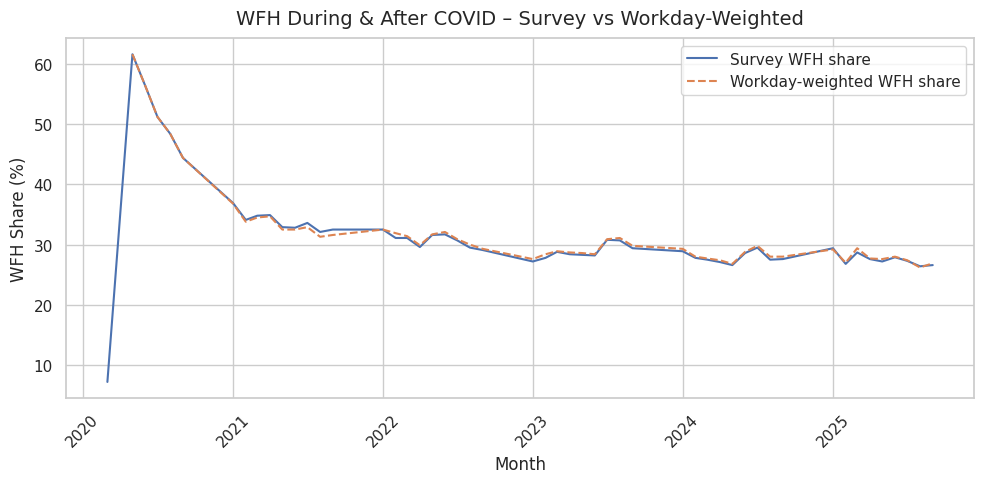

In [388]:
# Plotting monthly WFH trends during and after COVID using survey data (df10)
# and workday-weighted data (df12) to compare measurement methods.
# This code overlays both series on one chart to show how closely survey responses track actual worker-day behavior.

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df10["date"], df10["wfhcovid_matquestion"], label="Survey WFH share")
ax.plot(df12["date"], df12["wfhcovid_matquestion_daywt"],
        label="Workday-weighted WFH share", linestyle="--")

format_plot(
    "WFH During & After COVID – Survey vs Workday-Weighted",
    "Month",
    "WFH Share (%)"
)
ax.legend()
plt.show()


The graph shows that WFH levels peaked sharply during early COVID, then declined and stabilized around 27–30% afterward.
Both the survey-based and workday-weighted measures follow almost the same pattern, indicating that self-reported WFH rates are reliable.
The alignment of both lines suggests consistent long-term behavior in how employees and employers report remote work.


 WFH by Gender

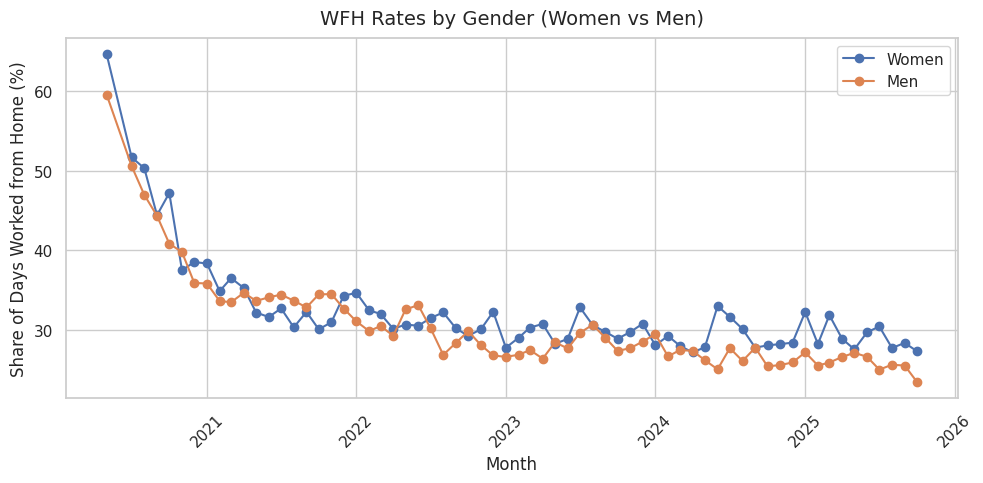

In [389]:
# Plotting WFH rates for women and men over time using monthly data from df8.
# This code overlays the two gender series to compare how their remote work shares change month by month.
# It helps visualize gender-based differences in WFH participation during and after the COVID period.

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df8["date"], df8["wfhcovid_fracmat_women"], label="Women", marker="o")
ax.plot(df8["date"], df8["wfhcovid_fracmat_men"], label="Men", marker="o")

format_plot(
    "WFH Rates by Gender (Women vs Men)",
    "Month",
    "Share of Days Worked from Home (%)"
)
ax.legend()
plt.show()


The graph shows that women consistently work from home slightly more than men throughout the observed period.
Both groups show a sharp decline after the pandemic peak, stabilizing in the 25–35% range.
The persistent gap suggests that women may have stronger preference or need for remote work due to structural or household factors.


 WFH Rates by Industry

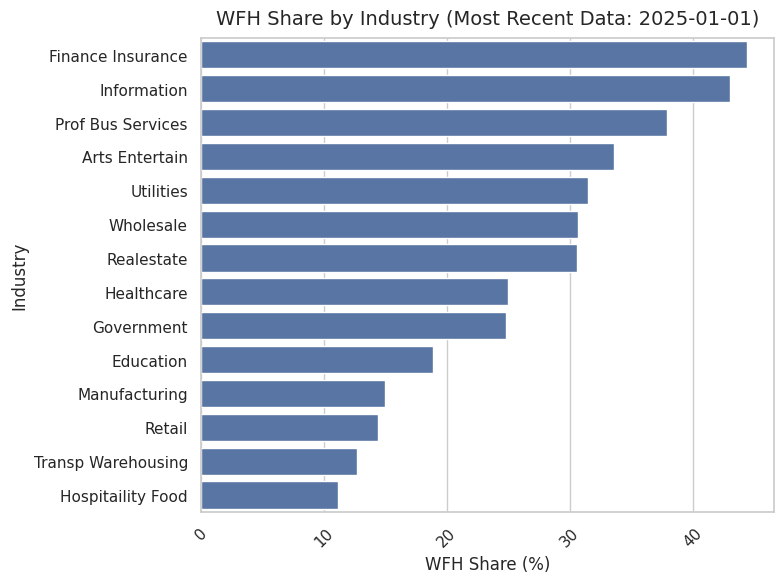

,date,industry,wfh_share
11,2025-01-01,Finance Insurance,44.40
27,2025-01-01,Information,43.08
35,2025-01-01,Prof Bus Services,37.93
3,2025-01-01,Arts Entertain,33.60
51,2025-01-01,Utilities,31.51


In [390]:
# Converting the industry WFH dataset into a long format to make it easier to plot and compare.
# Selecting only the most recent date to show a clear cross-sectional view of WFH levels across industries.
# Sorting industries by WFH share and creating a horizontal bar chart for better readability.


# Melt to long format for easier plotting
industry_cols = [c for c in df7.columns if c.startswith("wfh_fracmat_")]
id_vars = ["date"]
df7_long = df7[id_vars + industry_cols].melt(
    id_vars="date", var_name="industry", value_name="wfh_share"
)

# Clean industry names
df7_long["industry"] = df7_long["industry"].str.replace("wfh_fracmat_", "").str.replace("_", " ").str.title()

# Use latest date only for a cross-sectional comparison
latest_date = df7_long["date"].max()
df7_latest = df7_long[df7_long["date"] == latest_date].copy()

# Sort industries by WFH share
df7_latest = df7_latest.sort_values("wfh_share", ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df7_latest, x="wfh_share", y="industry", ax=ax)

format_plot(
    f"WFH Share by Industry (Most Recent Data: {latest_date.date()})",
    "WFH Share (%)",
    "Industry"
)
plt.show()

df7_latest.head()


This chart compares WFH adoption across industries using the most recent available data.
Finance, Information, and Professional Services show the highest remote work levels, while Hospitality, Retail, and Manufacturing remain the lowest.
The ranking highlights how WFH suitability strongly depends on the nature of work within each industry.


 Work Arrangements by Industry (Onsite vs Hybrid vs Remote)

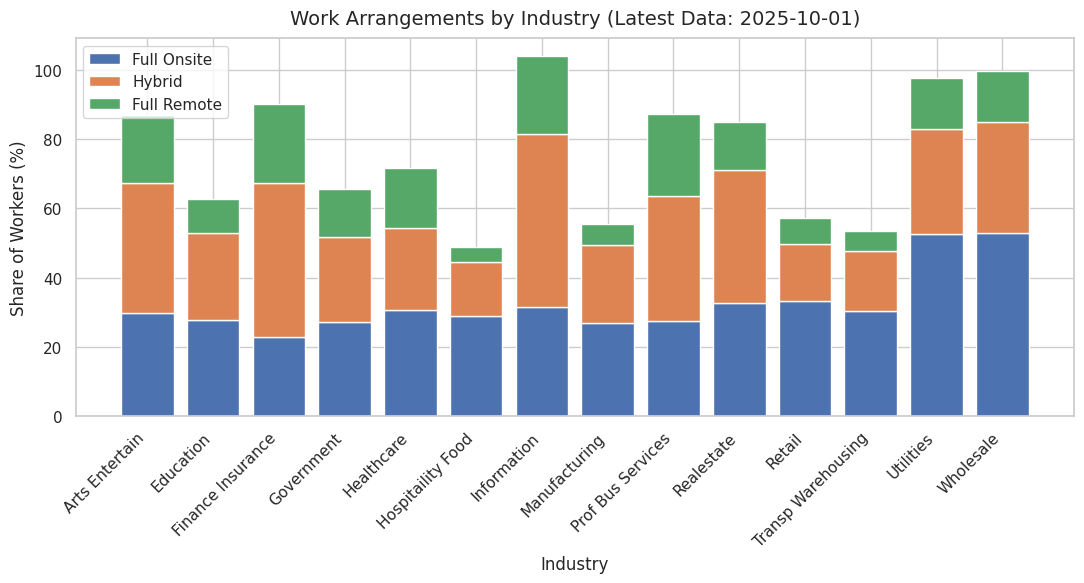

In [391]:
# Extracting the latest available date and preparing onsite, hybrid, and remote columns for each industry.
# Converting column names into readable industry labels and plotting a stacked bar chart to compare work modes.
# This visualization shows how industries differ in their mix of onsite, hybrid, and fully remote workers.

# Pick latest date
latest_date_wa = df11["date"].max()
wa_latest = df11[df11["date"] == latest_date_wa].copy()

# Columns for full onsite / hybrid / full remote – get patterns
onsite_cols  = [c for c in wa_latest.columns if c.startswith("full_onsite_")]
hybrid_cols  = [c for c in wa_latest.columns if c.startswith("hybrid_")]
remote_cols  = [c for c in wa_latest.columns if c.startswith("full_remote_")]

industries = [c.replace("full_onsite_", "").replace("_", " ").title()
              for c in onsite_cols]

onsite_vals = wa_latest[onsite_cols].iloc[0].values
hybrid_vals = wa_latest[hybrid_cols].iloc[0].values
remote_vals = wa_latest[remote_cols].iloc[0].values

x = np.arange(len(industries))

fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(x, onsite_vals, label="Full Onsite")
ax.bar(x, hybrid_vals, bottom=onsite_vals, label="Hybrid")
ax.bar(x, remote_vals, bottom=onsite_vals + hybrid_vals, label="Full Remote")

ax.set_xticks(x)
ax.set_xticklabels(industries, rotation=45, ha="right")

format_plot(
    f"Work Arrangements by Industry (Latest Data: {latest_date_wa.date()})",
    "Industry",
    "Share of Workers (%)"
)
ax.legend()
plt.show()


This chart compares how different industries split their workforce across onsite, hybrid, and fully remote arrangements.
Knowledge-based sectors like Information and Professional Services show higher hybrid or remote shares, while industries such as Retail, Manufacturing, and Hospitality remain predominantly onsite.
The distribution clearly highlights which industries have the flexibility for remote work and which rely heavily on physical presence.


Divergence chart: hybrid vs full onsite by industry (latest)

/tmp/ipython-input-4031870399.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-4031870399.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-4031870399.py:16: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-4031870399.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

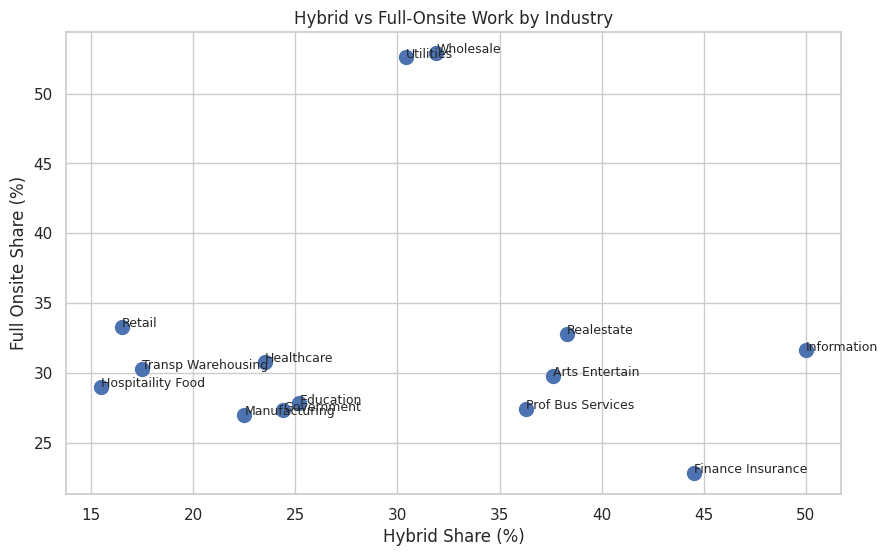

In [392]:
# Plotting a divergence scatter chart to compare hybrid vs full onsite work shares across industries.
# Each industry is positioned based on its hybrid percentage (x-axis) and onsite percentage (y-axis), with labels added for clarity.
# This visualization helps identify which industries lean more toward hybrid models and which remain largely onsite.


plt.figure(figsize=(10, 6))

plt.scatter(
    wa_latest[hybrid_cols].iloc[0],
    wa_latest[onsite_cols].iloc[0],
    s=100
)

for i, industry in enumerate(industries):
    plt.text(
        wa_latest[hybrid_cols].iloc[0][i],
        wa_latest[onsite_cols].iloc[0][i],
        industry,
        fontsize=9
    )

plt.title("Hybrid vs Full-Onsite Work by Industry")
plt.xlabel("Hybrid Share (%)")
plt.ylabel("Full Onsite Share (%)")
plt.grid(True)
plt.show()


This scatter plot shows how industries vary in their balance between hybrid and full onsite work.
Sectors like Information and Finance have high hybrid shares and low onsite shares, indicating greater remote flexibility.
In contrast, industries such as Utilities, Wholesale, and Retail have high onsite shares, showing limited adoption of hybrid work models.


Industry Cluster Analysis

In [393]:
# Applying K-Means clustering on the latest industry WFH percentages to group industries by similar adoption levels.
# Creating three clusters (Low, Medium, High WFH) and assigning descriptive labels for clearer interpretation.
# Plotting a scatter chart to visualize how industries naturally group based on their current remote work share.

from sklearn.cluster import KMeans

# Prepare data for clustering
industry_features = df7_latest[['wfh_share']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df7_latest.loc[:, 'cluster'] = kmeans.fit_predict(industry_features)
df7_latest.loc[:, 'cluster_name'] = df7_latest['cluster'].map({
    0: 'Low WFH (<20%)',
    1: 'Medium WFH (20-35%)',
    2: 'High WFH (>35%)'
})

px.scatter(df7_latest, x='industry', y='wfh_share', color='cluster_name',
           title='Industry Clusters by WFH Adoption').show()

The cluster plot shows clear separation between industries with high, medium, and low WFH adoption.
Knowledge-driven industries like Finance, Information, and Professional Services fall into the High WFH cluster,
while sectors requiring physical presence, such as Retail, Manufacturing, and Hospitality, cluster at the low end.
This reveals how the nature of work strongly influences an industry's ability to support remote work.


Trend of Remote/Hybrid/Onsite Work Arrangements by Industry

In [394]:
industries_to_plot = ['arts_entertain', 'finance_insurance', 'information']

# Prepare a list of all relevant columns for these industries
all_industry_cols = ['date']
for industry in industries_to_plot:
    all_industry_cols.append(f'full_onsite_{industry}')
    all_industry_cols.append(f'hybrid_{industry}')
    all_industry_cols.append(f'full_remote_{industry}')

# Create a dataframe with only the relevant columns
df11_trends = df11[all_industry_cols].copy()

# Rename columns for clarity in plotting
rename_cols = {}
for col in df11_trends.columns:
    if 'full_onsite_' in col:
        rename_cols[col] = col.replace('full_onsite_', '') + '_full_onsite'
    elif 'hybrid_' in col:
        rename_cols[col] = col.replace('hybrid_', '') + '_hybrid'
    elif 'full_remote_' in col:
        rename_cols[col] = col.replace('full_remote_', '') + '_full_remote'
df11_trends = df11_trends.rename(columns=rename_cols)

df11_trends.head()

,date,arts_entertain_full_onsite,arts_entertain_hybrid,arts_entertain_full_remote,finance_insurance_full_onsite,finance_insurance_hybrid,finance_insurance_full_remote,information_full_onsite,information_hybrid,information_full_remote
2,2022-01-01,31.4,44.6,24.0,25.8,44.5,29.7,29.5,47.7,22.8
3,2022-02-01,41.0,35.3,23.7,28.8,42.4,28.7,24.1,48.6,27.3
4,2022-03-01,36.8,39.7,23.5,29.3,45.8,24.9,22.2,48.8,29.0
5,2022-04-01,38.6,37.7,23.8,28.1,48.2,23.7,20.2,53.7,26.1
6,2022-05-01,43.5,37.0,19.5,28.0,50.6,21.4,22.4,52.8,24.7


In [395]:
# Looping through selected industries to create individual stacked-area charts of onsite, hybrid, and remote work trends.
# The code reshapes each industry's data into long format, cleans labels, and plots how work arrangements change over time.
# This helps visualize the dynamic shift between onsite, hybrid, and remote work for each industry year by year.

import plotly.express as px

for industry in industries_to_plot:
    # Select columns for the current industry
    industry_cols = [
        'date',
        f'{industry}_full_onsite',
        f'{industry}_hybrid',
        f'{industry}_full_remote'
    ]

    # Create a temporary DataFrame for the current industry
    temp_df = df11_trends[industry_cols].copy()

    # Melt to long format
    temp_df_long = pd.melt(
        temp_df,
        id_vars=['date'],
        var_name='Work Arrangement',
        value_name='Share (%)'
    )

    # Clean 'Work Arrangement' names for display
    temp_df_long['Work Arrangement'] = temp_df_long['Work Arrangement'].str.replace(f'{industry}_', '').str.replace('_', ' ').str.title()

    # Create stacked area chart
    fig = px.area(
        temp_df_long,
        x='date',
        y='Share (%)',
        color='Work Arrangement',
        title=f'Work Arrangement Trends for {industry.replace("_", " ").title()} Over Time',
        labels={
            'date': 'Date',
            'Share (%)': 'Share of Workers (%)'
        },
        line_group='Work Arrangement'
    )
    fig.update_layout(hovermode="x unified")
    fig.show()


 Micro-Level Preferences: WFH_WFO Survey

In [396]:
# Calculating the percentage distribution of the target variable (0 = Onsite, 1 = WFH).
# This gives a quick overview of how many respondents prefer WFH versus onsite work.


df9["target"].value_counts(normalize=True) * 100


,proportion
target,
0,59.42029
1,40.57971


The distribution shows that about 59% of respondents prefer onsite work (target = 0), while about 41% prefer work-from-home (target = 1).
This indicates that onsite preference is slightly higher in the dataset, setting the baseline before exploring what influences WFH preference.


In [397]:
# Computing crosstabs to examine how satisfaction factors relate to the WFH preference (target) variable.
# Each crosstab shows row-wise percentages comparing satisfaction responses with WFH vs onsite choices.

satisfaction_cols = [
    "rm_save_money", "rm_quality_time", "rm_better_sleep",
    "rm_better_work_life_balance"
]

for col in satisfaction_cols:
    crosstab = pd.crosstab(df9[col], df9["target"], normalize="index") * 100
    print(f"\n {col} vs Target (row %)**")
    print(crosstab.round(1))



 rm_save_money vs Target (row %)**
target            0     1
rm_save_money            
No             58.8  41.2
Yes            59.6  40.4

 rm_quality_time vs Target (row %)**
target              0     1
rm_quality_time            
No               66.7  33.3
Yes              55.6  44.4

 rm_better_sleep vs Target (row %)**
target              0     1
rm_better_sleep            
No               76.3  23.7
Yes              38.7  61.3

 rm_better_work_life_balance vs Target (row %)**
target                          0     1
rm_better_work_life_balance            
1                            90.0  10.0
2                            69.2  30.8
3                            63.2  36.8
4                            55.6  44.4
5                            11.1  88.9


These crosstabs help identify which satisfaction factors are associated with a stronger preference for WFH.
By comparing row percentages, we can see how responses like saving money, better sleep, or improved work-life balance differ between WFH and onsite groups.


 Summary Statistics for All Datasets

In [398]:
# Summary statistics for all datasets

datasets = {
    "df1_plans": df1,
    "df5_longrun": df5,
    "df6_city": df6,
    "df7_industry": df7,
    "df8_gender": df8,
    "df10_monthly": df10,
    "df11_arrangements": df11,
    "df12_dayweighted": df12,
    "df13_desires": df13
}

for name, df in datasets.items():
    print(f"\n SUMMARY STATISTICS: {name} \n")
    display(df.describe(include="all"))



 SUMMARY STATISTICS: df1_plans 



,date,wfh_days_postcovid_planmad,wfh_days_postcovid_plan_emad,wfhcovid_fracmat_hmad,wfhcovid_fracmat_emad,license,citation,notes
count,65,65.000000,65,65.000000,65.000000,65,65,65
unique,NaN,NaN,29,NaN,NaN,1,1,1
top,NaN,NaN,SWAA,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,18,NaN,NaN,65,65,65
mean,2023-08-13 16:14:46.153846272,8.696615,NaN,1.503077,2.376462,NaN,NaN,NaN
min,2020-07-01 00:00:00,1.060000,NaN,1.300000,2.190000,NaN,NaN,NaN
25%,2022-05-01 00:00:00,1.440000,NaN,1.410000,2.290000,NaN,NaN,NaN
50%,2024-02-01 00:00:00,1.500000,NaN,1.450000,2.340000,NaN,NaN,NaN
75%,2025-01-01 00:00:00,26.600000,NaN,1.530000,2.400000,NaN,NaN,NaN
max,2025-09-01 00:00:00,29.500000,NaN,2.400000,3.250000,NaN,NaN,NaN



 SUMMARY STATISTICS: df5_longrun 



,date,wfh_share,source_historical_series,fullremote_hist,source_fullremote_hist,notes,license,citation
count,72,72.000000,72,72.000000,72,72,72,72
unique,NaN,NaN,3,NaN,2,3,2,2
top,NaN,NaN,SWAA,NaN,Unknown,Unknown,Unknown,Unknown
freq,NaN,NaN,50,NaN,55,70,71,71
mean,2017-07-29 15:40:00,23.600000,NaN,3.012500,NaN,NaN,NaN,NaN
min,1965-01-01 00:00:00,0.400000,NaN,1.800000,NaN,NaN,NaN,NaN
25%,2015-10-01 18:00:00,6.400000,NaN,3.000000,NaN,NaN,NaN,NaN
50%,2021-11-01 00:00:00,27.850000,NaN,3.000000,NaN,NaN,NaN,NaN
75%,2023-10-01 12:00:00,31.100000,NaN,3.000000,NaN,NaN,NaN,NaN
max,2025-09-01 00:00:00,61.600000,NaN,4.700000,NaN,NaN,NaN,NaN



 SUMMARY STATISTICS: df6_city 



,date,wfhcovid_series_top10_ma6_,wfhcovid_series_11to50_ma6_,wfhcovid_series_other_ma6_,wfhcovid_series_ma6_atlanta,wfhcovid_series_ma6_bayarea,wfhcovid_series_ma6_chicagoland,wfhcovid_series_ma6_dc,wfhcovid_series_ma6_dallas,wfhcovid_series_ma6_houston,wfhcovid_series_ma6_losangeles,wfhcovid_series_ma6_miami,wfhcovid_series_ma6_newyork,notes,license,citation
count,65,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65,65,65
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,64,64
mean,2023-05-23 07:00:55.384615424,34.361538,29.904615,27.407692,36.699231,37.103077,32.768462,35.235385,34.781538,31.906154,38.332308,35.216923,36.897692,NaN,NaN,NaN
min,2020-10-01 00:00:00,26.200000,27.000000,22.800000,27.300000,27.300000,27.800000,29.200000,24.500000,23.900000,31.900000,29.200000,30.000000,NaN,NaN,NaN
25%,2022-02-01 00:00:00,31.100000,28.100000,25.900000,31.900000,33.200000,30.400000,31.500000,32.600000,28.900000,34.800000,32.300000,31.200000,NaN,NaN,NaN
50%,2023-06-01 00:00:00,33.600000,29.200000,26.600000,34.550000,36.400000,31.750000,33.300000,33.800000,30.900000,36.000000,34.300000,35.750000,NaN,NaN,NaN
75%,2024-10-01 00:00:00,37.700000,30.400000,28.800000,40.500000,40.300000,33.400000,38.200000,35.300000,34.000000,41.000000,36.500000,39.900000,NaN,NaN,NaN
max,2025-10-01 00:00:00,51.100000,44.000000,42.300000,98.100000,98.900000,78.800000,91.900000,98.200000,87.800000,100.900000,91.700000,98.500000,NaN,NaN,NaN



 SUMMARY STATISTICS: df7_industry 



,date,wfh_fracmat_arts_entertain,wfh_fracmat_education,wfh_fracmat_finance_insurance,wfh_fracmat_government,wfh_fracmat_healthcare,wfh_fracmat_hospitaility_food,wfh_fracmat_information,wfh_fracmat_manufacturing,wfh_fracmat_prof_bus_services,wfh_fracmat_realestate,wfh_fracmat_retail,wfh_fracmat_transp_warehousing,wfh_fracmat_utilities,wfh_fracmat_wholesale,license,citation,notes
count,4,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4,4,4
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,3
mean,2023-07-02 18:00:00,34.17500,21.125000,44.300000,25.650000,25.475000,11.075000,45.392500,16.175000,39.137500,31.457500,14.237500,13.097500,29.865000,31.175000,NaN,NaN,NaN
min,2022-01-01 00:00:00,32.50000,18.900000,43.100000,24.100000,25.000000,10.200000,43.080000,14.950000,37.930000,26.090000,13.460000,12.670000,28.180000,26.440000,NaN,NaN,NaN
25%,2022-10-01 18:00:00,33.32500,19.350000,44.075000,24.625000,25.150000,10.875000,44.310000,15.850000,38.725000,29.442500,13.865000,13.060000,28.285000,29.222500,NaN,NaN,NaN
50%,2023-07-02 12:00:00,34.25000,20.600000,44.600000,25.800000,25.450000,11.150000,45.030000,16.150000,39.075000,32.110000,14.215000,13.220000,29.885000,30.425000,NaN,NaN,NaN
75%,2024-04-01 12:00:00,35.10000,22.375000,44.825000,26.825000,25.775000,11.350000,46.112500,16.475000,39.487500,34.125000,14.587500,13.257500,31.465000,32.377500,NaN,NaN,NaN
max,2025-01-01 00:00:00,35.70000,24.400000,44.900000,26.900000,26.000000,11.800000,48.430000,17.450000,40.470000,35.520000,15.060000,13.280000,31.510000,37.410000,NaN,NaN,NaN



 SUMMARY STATISTICS: df8_gender 



,date,wfhcovid_fracmat_women,wfhcovid_fracmat_men,license,citation,notes
count,65,65.000000,65.000000,65,65,65
unique,NaN,NaN,NaN,2,2,3
top,NaN,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,NaN,64,64,63
mean,2023-01-30 10:42:27.692307712,32.388615,30.710000,NaN,NaN,NaN
min,2020-05-01 00:00:00,27.130000,23.420000,NaN,NaN,NaN
25%,2021-10-01 00:00:00,28.860000,26.630000,NaN,NaN,NaN
50%,2023-02-01 00:00:00,30.490000,28.420000,NaN,NaN,NaN
75%,2024-06-01 00:00:00,32.430000,33.460000,NaN,NaN,NaN
max,2025-10-01 00:00:00,64.660000,59.580000,NaN,NaN,NaN



 SUMMARY STATISTICS: df10_monthly 



,date,wfhcovid_matquestion,wfhcovid_frac_hps,notes,license,citation
count,51,51.000000,51.000000,51,51,51
unique,NaN,NaN,NaN,4,2,2
top,NaN,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,NaN,48,50,50
mean,2022-12-29 00:00:00,31.554902,29.203922,NaN,NaN,NaN
min,2020-03-01 00:00:00,7.200000,28.000000,NaN,NaN,NaN
25%,2021-07-16 12:00:00,27.700000,29.100000,NaN,NaN,NaN
50%,2023-02-01 00:00:00,29.400000,29.100000,NaN,NaN,NaN
75%,2024-05-16 12:00:00,32.500000,29.100000,NaN,NaN,NaN
max,2025-09-01 00:00:00,61.600000,31.900000,NaN,NaN,NaN



 SUMMARY STATISTICS: df11_arrangements 



,date,full_onsite_arts_entertain,full_onsite_education,full_onsite_finance_insurance,full_onsite_government,full_onsite_healthcare,full_onsite_hospitaility_food,full_onsite_information,full_onsite_manufacturing,full_onsite_prof_bus_services,full_onsite_realestate,full_onsite_retail,full_onsite_transp_warehousing,full_onsite_utilities,full_onsite_wholesale,hybrid_arts_entertain,hybrid_education,hybrid_finance_insurance,hybrid_government,hybrid_healthcare,hybrid_hospitaility_food,hybrid_information,hybrid_manufacturing,hybrid_prof_bus_services,hybrid_realestate,hybrid_retail,hybrid_transp_warehousing,hybrid_utilities,hybrid_wholesale,full_remote_arts_entertain,full_remote_education,full_remote_finance_insurance,full_remote_government,full_remote_healthcare,full_remote_hospitaility_food,full_remote_information,full_remote_manufacturing,full_remote_prof_bus_services,full_remote_realestate,full_remote_retail,full_remote_transp_warehousing,full_remote_utilities,full_remote_wholesale,notes,license,citation
count,52,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52,52,52
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,52,52
mean,2024-04-27 07:50:46.153846272,38.528846,55.788462,29.728846,54.148077,52.475000,67.859615,28.203846,60.775000,36.973077,44.603846,65.136538,64.825000,53.040385,52.392308,38.003846,25.082692,44.776923,24.244231,23.309615,15.659615,50.276923,22.619231,35.651923,38.028846,16.673077,17.542308,31.119231,31.734615,19.267308,9.836538,23.351923,14.157692,17.228846,4.263462,22.590385,6.230769,23.907692,13.767308,7.469231,5.948077,15.088462,15.740385,NaN,NaN,NaN
min,2022-01-01 00:00:00,26.200000,27.700000,22.800000,27.300000,27.300000,29.000000,20.200000,24.500000,23.900000,32.800000,31.300000,30.000000,40.700000,39.900000,29.200000,19.900000,37.900000,18.000000,19.600000,12.900000,43.800000,17.200000,29.700000,28.000000,13.700000,13.400000,16.100000,20.000000,12.900000,5.700000,18.800000,8.500000,14.200000,2.000000,15.400000,4.800000,18.500000,7.600000,5.700000,3.100000,4.900000,9.800000,NaN,NaN,NaN
25%,2023-04-23 12:00:00,31.275000,47.150000,26.175000,49.200000,50.750000,65.725000,25.225000,58.800000,32.575000,37.125000,63.025000,61.575000,51.350000,51.225000,36.425000,22.925000,43.650000,22.700000,22.775000,14.975000,49.025000,22.100000,34.425000,36.875000,15.475000,16.750000,29.150000,30.775000,16.500000,9.475000,22.175000,13.250000,17.025000,3.750000,22.175000,5.800000,23.000000,12.125000,7.000000,5.300000,13.875000,14.500000,NaN,NaN,NaN
50%,2024-09-16 00:00:00,41.000000,64.200000,30.150000,60.500000,58.150000,79.100000,29.300000,70.000000,39.400000,44.850000,74.250000,74.600000,52.600000,52.900000,37.600000,25.200000,44.500000,24.400000,23.500000,15.500000,50.000000,22.500000,36.300000,38.300000,16.500000,17.500000,30.400000,31.900000,19.500000,9.800000,22.700000,13.900000,17.400000,4.500000,22.400000,5.900000,23.500000,13.800000,7.400000,5.800000,14.700000,14.800000,NaN,NaN,NaN
75%,2025-05-08 18:00:00,44.000000,67.100000,32.500000,62.125000,60.400000,80.675000,31.125000,71.950000,40.925000,50.675000,77.325000,77.425000,54.250000,54.400000,3


 SUMMARY STATISTICS: df12_dayweighted 



,date,wfhcovid_matquestion_daywt,notes,license,citation
count,50,50.000000,50,50,50
unique,NaN,NaN,3,2,2
top,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,48,49,49
mean,2023-01-18 15:50:24,32.158000,NaN,NaN,NaN
min,2020-05-01 00:00:00,26.200000,NaN,NaN,NaN
25%,2021-08-08 18:00:00,28.000000,NaN,NaN,NaN
50%,2023-02-15 00:00:00,29.800000,NaN,NaN,NaN
75%,2024-05-24 06:00:00,32.400000,NaN,NaN,NaN
max,2025-09-01 00:00:00,61.600000,NaN,NaN,NaN



 SUMMARY STATISTICS: df13_desires 



,date,wfh_days_postcovid_desmad,wfh_days_postcovid_des_emad,wfhcovid_fracmat_hmad,wfhcovid_fracmat_emad,license,citation,notes
count,66,66.000000,66,66.000000,66.000000,66,66,66
unique,NaN,NaN,28,NaN,NaN,2,2,1
top,NaN,NaN,SWAA,NaN,NaN,Unknown,Unknown,Unknown
freq,NaN,NaN,18,NaN,NaN,65,65,66
mean,2023-07-26 12:00:00,9.259697,NaN,1.502273,2.375909,NaN,NaN,NaN
min,2020-05-01 00:00:00,2.090000,NaN,1.300000,2.190000,NaN,NaN,NaN
25%,2022-04-08 12:00:00,2.292500,NaN,1.410000,2.290000,NaN,NaN,NaN
50%,2024-02-01 00:00:00,2.405000,NaN,1.450000,2.340000,NaN,NaN,NaN
75%,2025-01-01 00:00:00,26.550000,NaN,1.530000,2.397500,NaN,NaN,NaN
max,2025-09-01 00:00:00,29.500000,NaN,2.400000,3.250000,NaN,NaN,NaN


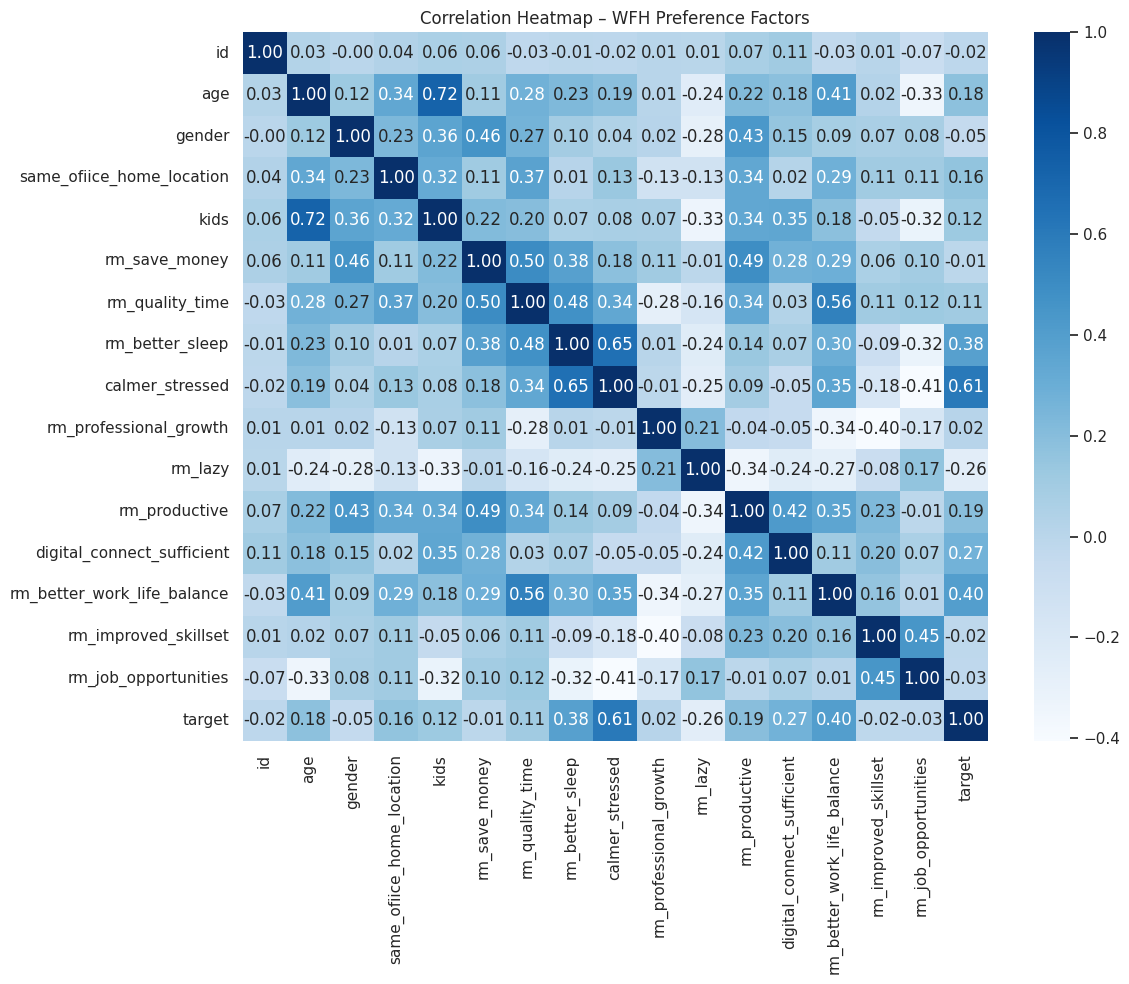

In [399]:
# Correlation heatmap for WFH preference survey

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df9_numeric = df9.copy()

# Map binary 'Yes'/'No' to 1/0 for relevant columns
binary_map = {'Yes': 1, 'No': 0}
for col in ['same_ofiice_home_location', 'kids', 'rm_save_money', 'rm_quality_time',
            'rm_better_sleep', 'digital_connect_sufficient', 'rm_job_opportunities']:
    if col in df9_numeric.columns:
        df9_numeric[col] = df9_numeric[col].map(binary_map)

# Map 'Female'/'Male' to 1/0 for 'gender'
gender_map = {'Female': 1, 'Male': 0}
if 'gender' in df9_numeric.columns:
    df9_numeric['gender'] = df9_numeric['gender'].map(gender_map)

# Map 'CALMER'/'STRESSED' to 1/0 for 'calmer_stressed'
calmer_stressed_map = {'CALMER': 1, 'STRESSED': 0}
if 'calmer_stressed' in df9_numeric.columns:
    df9_numeric['calmer_stressed'] = df9_numeric['calmer_stressed'].map(calmer_stressed_map)

# Select only numeric columns for correlation calculation
numeric_cols_for_corr = df9_numeric.select_dtypes(include=[np.number]).columns
corr = df9_numeric[numeric_cols_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlation Heatmap – WFH Preference Factors")
plt.tight_layout()
plt.show()

The heatmap shows mostly weak to moderate correlations among the WFH preference factors.
There are **no strong correlations (nothing above ~0.70)** except for a few internal links between related satisfaction variables (e.g., quality time, better sleep, calmer/stressed).
WFH preference (‘target’) has **moderate positive correlations** with factors like better sleep, better work–life balance, and feeling calmer, but demographic variables such as age and gender show **very weak or no meaningful correlation** with WFH preference.
Overall, the chart suggests that personal well-being and lifestyle improvements drive WFH interest much more than demographic characteristics.


Correlation Heatmap

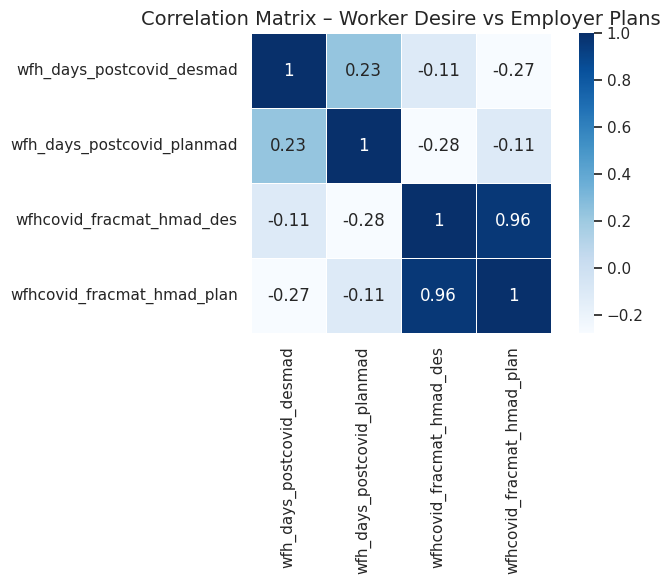

In [400]:
# Merging worker desire and employer plan datasets on date to compare aligned metrics.
# Selecting the key variables for desired vs planned WFH days and WFH shares, then computing their correlation matrix.
# Plotting a clean heatmap to visually compare how closely worker preferences match employer expectations.


merged = df13.merge(df1, on="date", suffixes=("_des", "_plan"), how="inner")

cols = [
    "wfh_days_postcovid_desmad",
    "wfh_days_postcovid_planmad",
    "wfhcovid_fracmat_hmad_des",
    "wfhcovid_fracmat_hmad_plan"
]

corr = merged[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5, square=True)
plt.title("Correlation Matrix – Worker Desire vs Employer Plans", fontsize=14)
plt.tight_layout()
plt.show()


The heatmap shows that worker-desired and employer-planned WFH days have only weak positive correlation (~0.23),
suggesting workers and employers often differ in how many days should be remote after COVID.

However, the strongest correlation in the matrix is between the WFH share variables  
(wfhcovid_fracmat_hmad_des vs wfhcovid_fracmat_hmad_plan = 0.96), indicating that worker and employer
estimates of *overall WFH share* are almost identical.

This means: while workers and employers may disagree on exact weekly remote days,  
their expectations about the *percentage of total work done remotely* are nearly the same — a strong alignment.


Remote/Hybrid/Onsite Trends Over Time

In [401]:
# Plotting time-series trends for full remote, hybrid, and full onsite work using df2’s current-period data.
# Each work arrangement is added as a stacked area (fill='tonexty') to clearly show changes in composition over time.
# This visualization helps compare how different work modes shift month-to-month.

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['date'], y=df2['full_remote_curr'],
                         name='Full Remote', fill='tonexty'))
fig.add_trace(go.Scatter(x=df2['date'], y=df2['hybrid_curr'],
                         name='Hybrid', fill='tonexty'))
fig.add_trace(go.Scatter(x=df2['date'], y=df2['full_onsite_curr'],
                         name='Full Onsite', fill='tonexty'))
fig.update_layout(title='Work Arrangement Trends Over Time')
fig.show()

The chart shows that full onsite work consistently remains the dominant arrangement over time, gradually increasing from around 55% to over 60%.
Hybrid work stays fairly stable between 25%–30%, showing moderate fluctuation but no major upward trend.
Full remote work slowly declines across the period, suggesting that employers may be shifting toward more onsite expectations while retaining hybrid as a steady middle ground.


WFH PREFERENCES

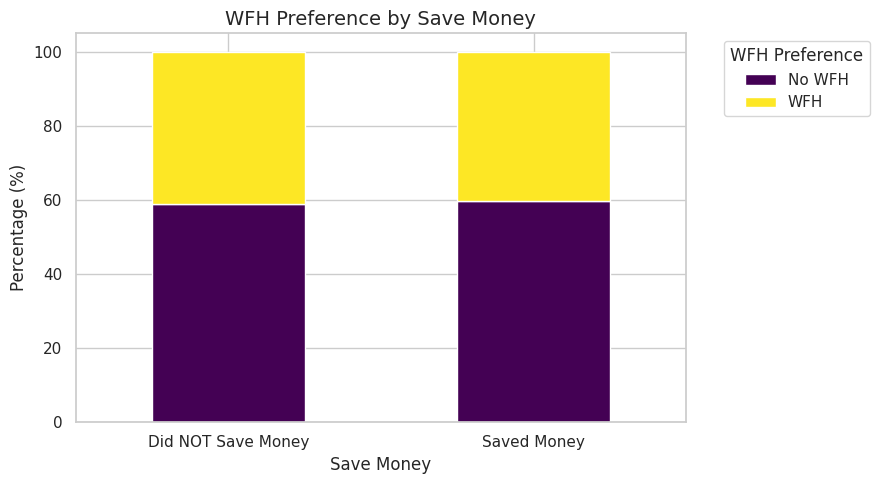

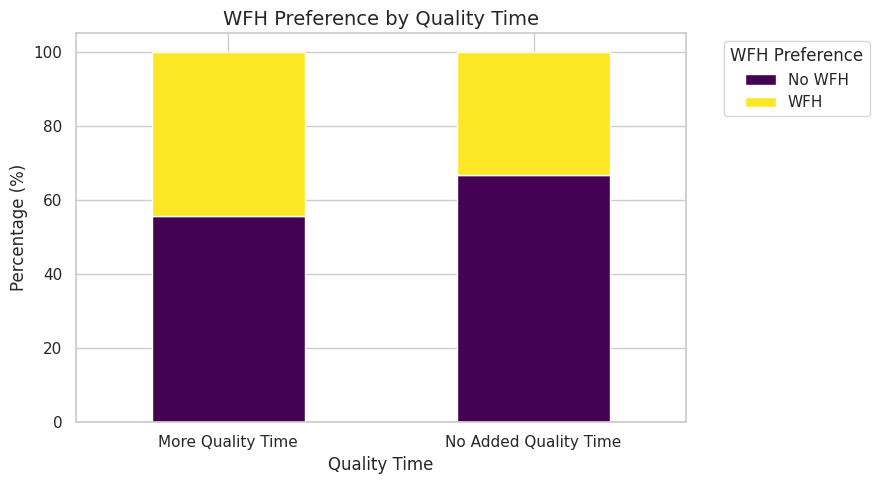

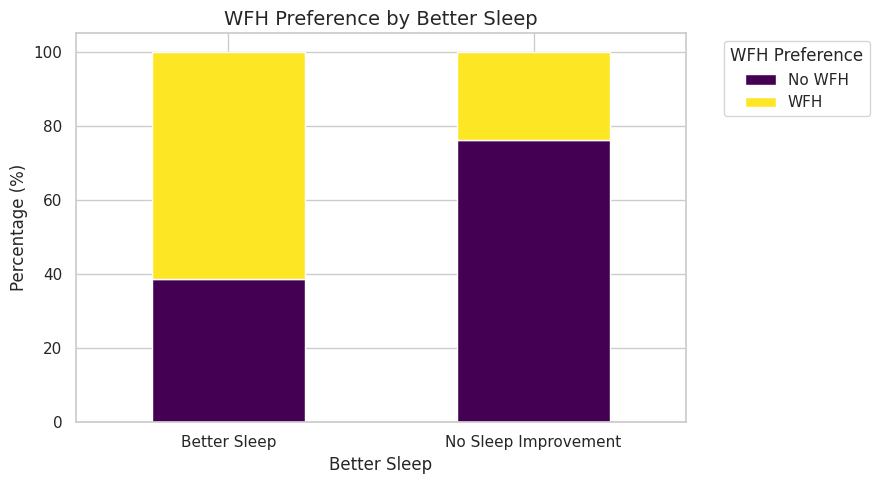

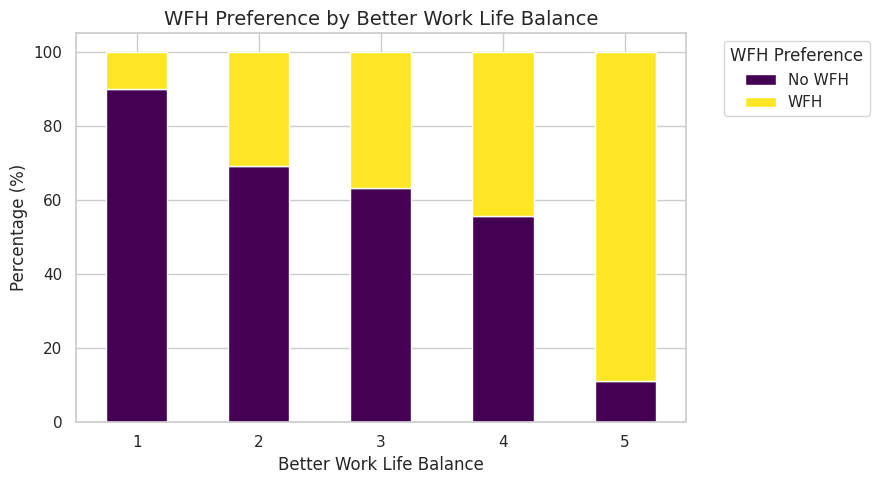

In [402]:
# Cleaning the satisfaction columns by mapping Yes/No responses into clearer labels
# and converting the target variable into readable categories (WFH / No WFH).
# For each satisfaction factor, generating a stacked bar chart to compare how WFH preference differs
# between respondents who experienced the benefit vs those who did not.


# Mapping for clear labels
label_map = {
    "rm_save_money": {"Yes": "Saved Money", "No": "Did NOT Save Money"},
    "rm_quality_time": {"Yes": "More Quality Time", "No": "No Added Quality Time"},
    "rm_better_sleep": {"Yes": "Better Sleep", "No": "No Sleep Improvement"},
}

# Apply mappings
for col, mapping in label_map.items():
    df9[col] = df9[col].replace(mapping)

# Convert target as before
df9["target_label"] = df9["target"].map({0: "No WFH", 1: "WFH"})

satisfaction_cols = [
    "rm_save_money", "rm_quality_time", "rm_better_sleep",
    "rm_better_work_life_balance"
]

for col in satisfaction_cols:
    crosstab = pd.crosstab(df9[col], df9["target_label"], normalize="index") * 100

    ax = crosstab.plot(kind='bar', stacked=True, figsize=(9, 5), cmap='viridis')

    plt.title(f"WFH Preference by {col.replace('rm_', '').replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(col.replace('rm_', '').replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Percentage (%)", fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title="WFH Preference", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

These stacked bar charts show how different satisfaction-related factors influence WFH preference.  
Respondents who reported benefits such as saving money, more quality time, or better sleep consistently show a higher share of WFH preference than those who did not experience these improvements.  
The strongest pattern appears in work–life balance: as work–life balance ratings increase from 1 to 5, the proportion of people preferring WFH rises sharply.  
Overall, the trends indicate that WFH preference is strongly driven by lifestyle advantages and personal well-being rather than demographic factors.


Multi-city comparison (4-panel)

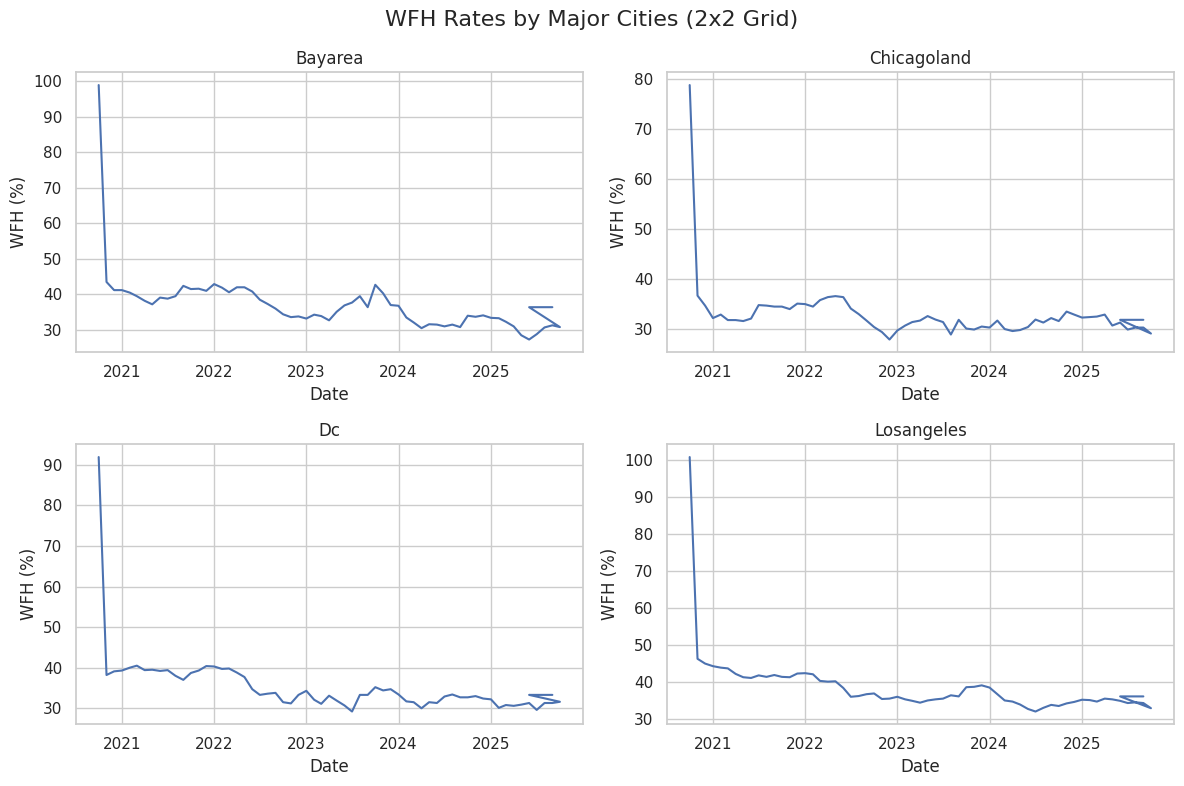

In [403]:
# Creating a 2x2 panel of line charts to compare WFH trends across four major cities.
# Looping through each city column to plot its WFH percentage over time, with consistent labels and titles.
# This grid layout makes it easy to visually compare how remote work patterns differ between large metropolitan areas.


cities = [
    "wfhcovid_series_ma6_bayarea",
    "wfhcovid_series_ma6_chicagoland",
    "wfhcovid_series_ma6_dc",
    "wfhcovid_series_ma6_losangeles"
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), cities):
    ax.plot(df6["date"], df6[col])
    ax.set_title(col.replace("wfhcovid_series_ma6_", "").title())
    ax.set_xlabel("Date")
    ax.set_ylabel("WFH (%)")

plt.suptitle("WFH Rates by Major Cities (2x2 Grid)", fontsize=16)
plt.tight_layout()
plt.show()


The multi-city comparison shows that all four cities experienced a sharp drop in WFH rates immediately after the COVID peak,
followed by a gradual stabilization. The Bay Area consistently maintains the highest WFH levels, reflecting its tech-heavy workforce.
Chicago and DC show moderate WFH rates, while Los Angeles displays more variation but ultimately converges to similar levels.
Overall, the patterns indicate that although cities differ in magnitude, all major metros follow the same post-COVID downward trend and stabilization.


WFH Rates by City (6 Month Moving Average)

In [404]:
# Reshaping the city-level WFH dataset into long format so multiple cities can be plotted on a single time-series chart.
# Cleaning city labels for readability and using Plotly to draw smooth line trends (6-month moving average) for all cities.
# This visualization allows easy comparison of how WFH adoption differs across major metropolitan areas over time.


city_cols = [
    "wfhcovid_series_ma6_bayarea",
    "wfhcovid_series_ma6_newyork",
    "wfhcovid_series_ma6_atlanta",
    "wfhcovid_series_ma6_chicagoland",
    "wfhcovid_series_ma6_dc",
    "wfhcovid_series_ma6_losangeles",
    "wfhcovid_series_ma6_dallas",
    "wfhcovid_series_ma6_houston",
    "wfhcovid_series_ma6_miami"
]

df6_long = pd.melt(df6, id_vars=['date'], value_vars=[c for c in city_cols if c in df6.columns],
                   var_name='City', value_name='WFH Share (%)')
df6_long['City'] = df6_long['City'].str.replace('wfhcovid_series_ma6_', '').str.title()

In [405]:
fig_wfh_cities = px.line(
    df6_long,
    x='date',
    y='WFH Share (%)',
    color='City',
    title='WFH Rates by City (6-Month Moving Average)',
    labels={
        'date': 'Month',
        'WFH Share (%)': 'WFH Share (%)'
    }
)


In [406]:

fig_wfh_cities.show()

The multi-city moving-average chart shows a strong convergence in WFH rates across most US metropolitan areas.
After the initial COVID spike, all cities stabilize between roughly 28% and 38% WFH, with only minor differences:
the Bay Area remains slightly higher due to its tech-oriented workforce, while cities like Houston and Miami trend lower.
Overall, despite geographic and economic differences, major cities follow a remarkably similar downward adjustment and stabilization in remote work.


Correlation Between Personal Factors and WFH Preference

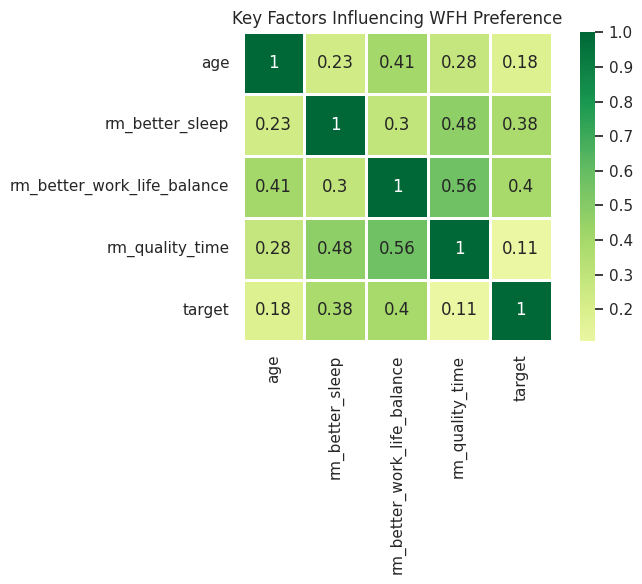

In [407]:
# Selecting a subset of key personal and satisfaction variables to examine their correlations with WFH preference.
# Computing a correlation matrix for these variables and visualizing it using a heatmap for easier interpretation.
# This helps identify which individual factors are most strongly associated with choosing WFH.

key_factors = ['age', 'rm_better_sleep', 'rm_better_work_life_balance',
               'rm_quality_time', 'target']
subset_corr = df9_numeric[key_factors].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(subset_corr, annot=True, cmap='RdYlGn', center=0,
            square=True, linewidths=1)
plt.title('Key Factors Influencing WFH Preference')
plt.tight_layout()
plt.show()

The heatmap shows that personal well-being factors have the strongest relationship with WFH preference.
Better sleep (0.38) and improved work–life balance (0.40) show moderate positive correlations with preferring WFH,
while age and quality time have weak relationships. There are **no strong correlations** (none exceed 0.7),
but the pattern clearly indicates that comfort and lifestyle improvements—not demographics—are the main drivers of WFH preference.


 ROI/Cost-Benefit Analysis

In [408]:
# Simulating cost, productivity, and satisfaction outcomes for three work models: Full Office, Hybrid, and Full WFH.
# Creating a small comparison dataset to evaluate trade-offs in real estate cost, IT investment, productivity, and employee satisfaction.
# This forms the basis for a simple ROI-style evaluation of which work model provides the best balance of cost savings and performance.

models = ['Full Office', 'Hybrid (50%)', 'Full WFH']
real_estate_cost = [100, 50, 10]
it_infrastructure = [50, 70, 80]
productivity_index = [95, 110, 108]
employee_satisfaction = [6.5, 8.5, 8.0]

cost_df = pd.DataFrame({
    'Model': models,
    'Real Estate': real_estate_cost,
    'IT Infrastructure': it_infrastructure,
    'Productivity': productivity_index,
    'Satisfaction': employee_satisfaction
})
display(cost_df)

,Model,Real Estate,IT Infrastructure,Productivity,Satisfaction
0,Full Office,100,50,95,6.5
1,Hybrid (50%),50,70,110,8.5
2,Full WFH,10,80,108,8.0


The table compares the three work models across key cost and performance indicators.  
Hybrid work offers the best overall balance: it cuts real estate costs by 50%, boosts productivity the most (110),
and shows the highest employee satisfaction (8.5).  
Full WFH maximizes real estate savings but requires higher IT investment, while Full Office is the most costly with the lowest satisfaction.  
This suggests that a hybrid model provides the strongest ROI when considering both financial and human factors.


ROI Bar Chart (Cost, Productivity, Satisfaction)

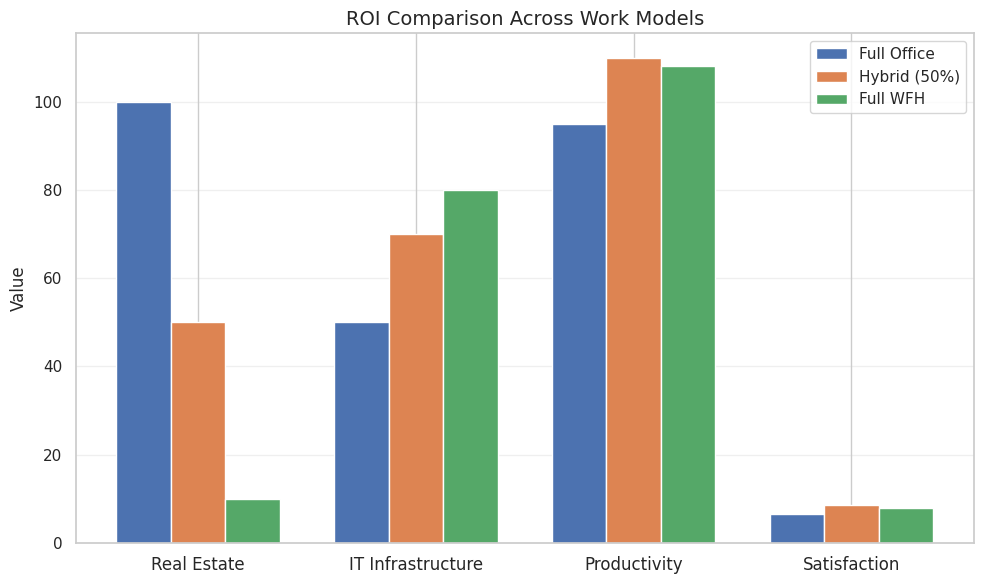

In [409]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Real Estate', 'IT Infrastructure', 'Productivity', 'Satisfaction']
models = cost_df['Model']

values = cost_df[metrics].values.T
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(x + i*width, values[:, i], width, label=model)

plt.xticks(x + width, metrics, fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title("ROI Comparison Across Work Models", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


The ROI comparison clearly shows that the hybrid model provides the most balanced and advantageous outcome among the three work arrangements.
It significantly reduces real estate costs compared to full office, while still maintaining strong productivity and delivering the highest employee satisfaction.
Although full WFH offers the greatest real estate savings, it requires higher IT infrastructure investment and slightly lower productivity.
Full office is the least efficient option, with the highest cost and lowest satisfaction.
Overall, the hybrid model presents the best return on investment by optimizing cost savings without compromising productivity or employee morale.


Distribution of WFH Preference Factors from Survey Data



/tmp/ipython-input-2695208742.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




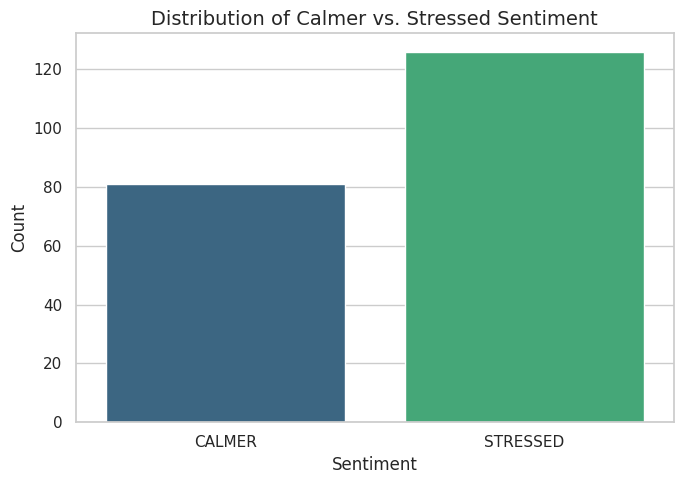

In [410]:
# Plotting the distribution of emotional states (Calmer vs. Stressed) reported in the survey.
# Using a simple countplot to show how many respondents felt calmer versus stressed while working.
# This visualization helps identify overall emotional trends related to remote or onsite work.


plt.figure(figsize=(7, 5))
sns.countplot(data=df9, x='calmer_stressed', palette='viridis')
plt.title('Distribution of Calmer vs. Stressed Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The distribution shows that more respondents reported feeling stressed compared to feeling calmer.
This suggests that a significant portion of the workforce experiences higher stress levels during work, which may influence their preference for WFH.
Understanding this emotional divide is important because calmer employees tend to show stronger preference for remote work in other sections of the analysis.


/tmp/ipython-input-2311382218.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




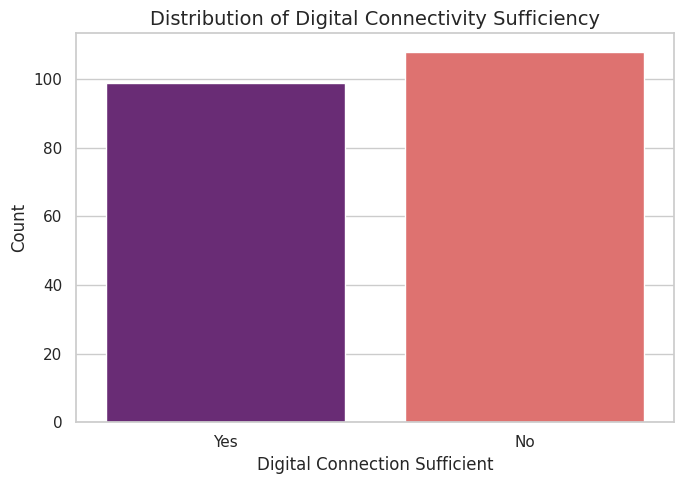

In [411]:
# Plotting the distribution of responses for digital connectivity sufficiency from the survey.
# This countplot helps visualize how many respondents feel they have adequate digital connectivity for remote work.
# Useful for understanding whether technical limitations may influence WFH preference.


plt.figure(figsize=(7, 5))
sns.countplot(data=df9, x='digital_connect_sufficient', palette='magma')
plt.title('Distribution of Digital Connectivity Sufficiency', fontsize=14)
plt.xlabel('Digital Connection Sufficient', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The distribution shows that slightly more respondents report insufficient digital connectivity compared to those who feel their setup is adequate.
This suggests that technical constraints remain a challenge for a notable portion of the workforce.
Low connectivity could reduce productivity or comfort while working remotely, which may influence WFH preference in other parts of the analysis.


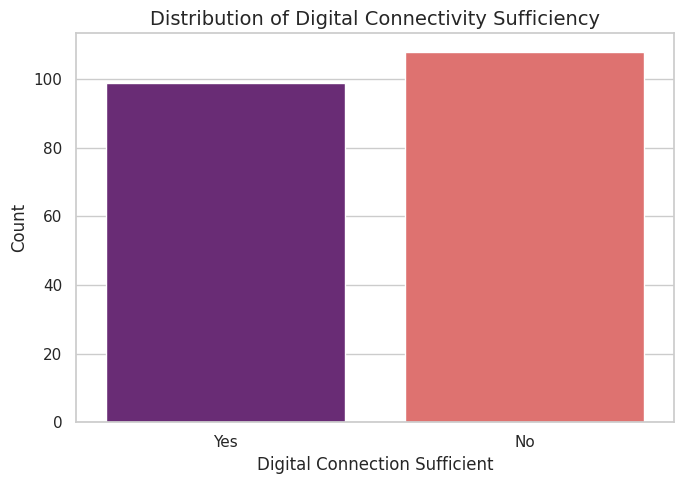

In [412]:
# Plotting the distribution of digital connectivity sufficiency from the survey
# Shows how many respondents feel their internet setup is adequate vs inadequate
# Helps understand if technical limitations affect WFH preferences


plt.figure(figsize=(7, 5))
sns.countplot(data=df9, x='digital_connect_sufficient', hue='digital_connect_sufficient', palette='magma', legend=False)
plt.title('Distribution of Digital Connectivity Sufficiency', fontsize=14)
plt.xlabel('Digital Connection Sufficient', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

The chart shows that a slightly higher number of respondents report insufficient digital connectivity compared to those who say their connection is adequate. This indicates that technical and internet-related limitations are still a barrier for fully effective remote work. Improving digital infrastructure could significantly enhance employee satisfaction and productivity in WFH environments.

/tmp/ipython-input-1977769205.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




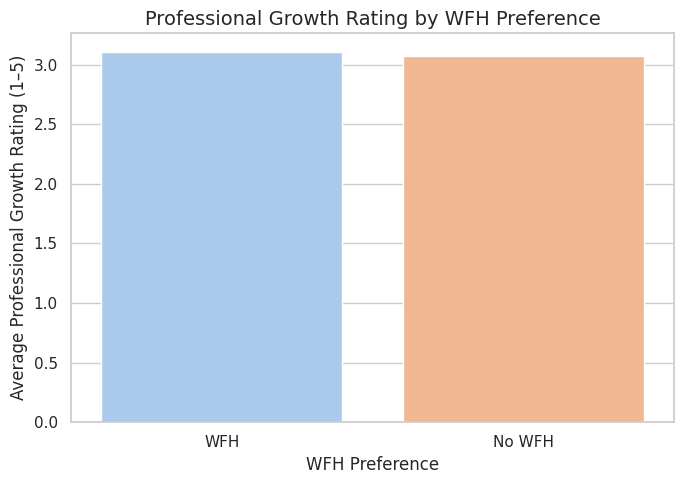

In [413]:
plt.figure(figsize=(7,5))

sns.barplot(
    data=df9,
    x='target_label',
    y='rm_professional_growth',
    palette='pastel',
    errorbar=None      # removes error bars for a simple clean look
)

plt.title("Professional Growth Rating by WFH Preference", fontsize=14)
plt.xlabel("WFH Preference", fontsize=12)
plt.ylabel("Average Professional Growth Rating (1–5)", fontsize=12)
plt.tight_layout()
plt.show()


The chart shows that professional growth ratings are almost identical for employees who prefer WFH and those who prefer office work. This suggests that WFH does not negatively affect employees’ sense of career growth. Overall, professional development perceptions remain consistent across both groups.

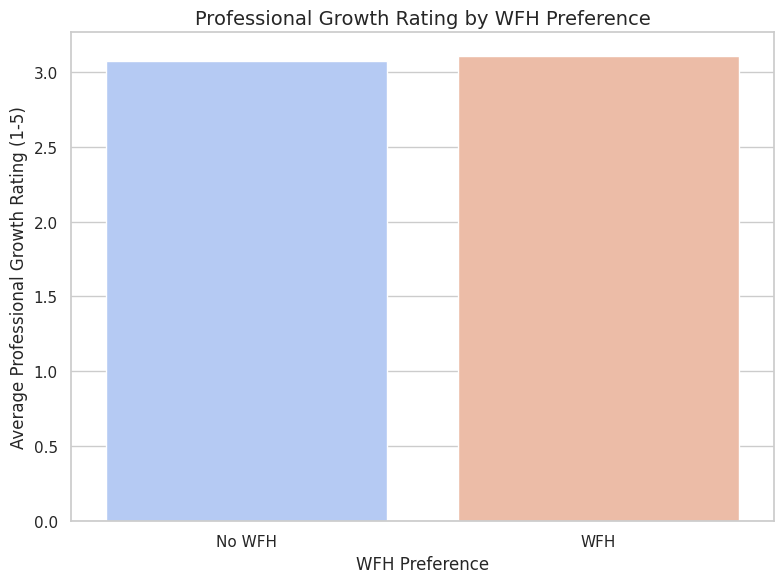

In [414]:
plt.figure(figsize=(8, 6))

# Calculate mean values for each group
mean_growth = df9.groupby("target_label")["rm_professional_growth"].mean().reset_index()

sns.barplot(
    data=mean_growth,
    x='target_label',
    y='rm_professional_growth',
    hue='target_label',
    palette='coolwarm',
    legend=False
)

plt.title('Professional Growth Rating by WFH Preference', fontsize=14)
plt.xlabel('WFH Preference', fontsize=12)
plt.ylabel('Average Professional Growth Rating (1-5)', fontsize=12)

plt.tight_layout()
plt.show()


Both WFH and No-WFH groups report almost the same average professional growth rating (~3.1/5). This shows that WFH preference does not significantly impact perceptions of career growth, suggesting development opportunities remain consistent regardless of work location.

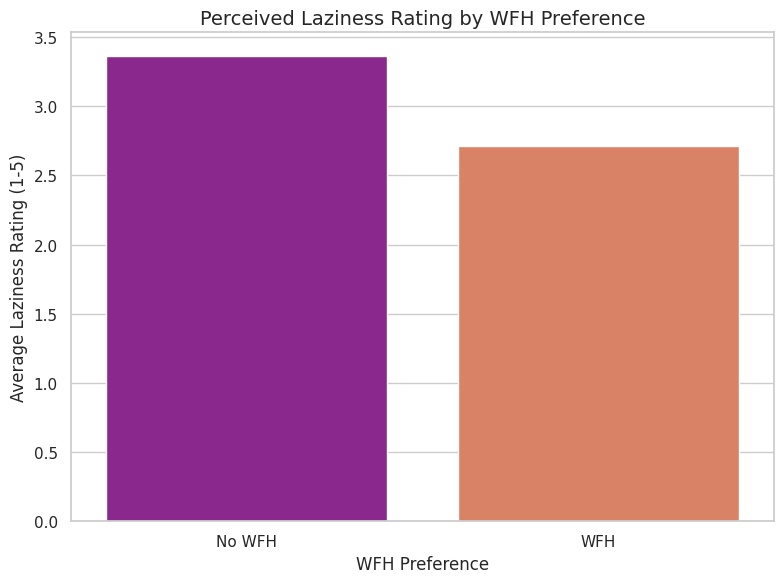

In [415]:
plt.figure(figsize=(8, 6))

# Calculate average laziness rating for each group
mean_lazy = df9.groupby("target_label")["rm_lazy"].mean().reset_index()

sns.barplot(
    data=mean_lazy,
    x="target_label",
    y="rm_lazy",
    hue="target_label",
    palette="plasma",
    legend=False
)

plt.title("Perceived Laziness Rating by WFH Preference", fontsize=14)
plt.xlabel("WFH Preference", fontsize=12)
plt.ylabel("Average Laziness Rating (1-5)", fontsize=12)
plt.tight_layout()
plt.show()


People who prefer No WFH rate themselves as more lazy on average (≈3.3/5) compared to those who prefer WFH (≈2.7/5).
This suggests that individuals who prefer remote work do not perceive themselves as “lazy” — in fact, they rate themselves less lazy than office-preferring workers.

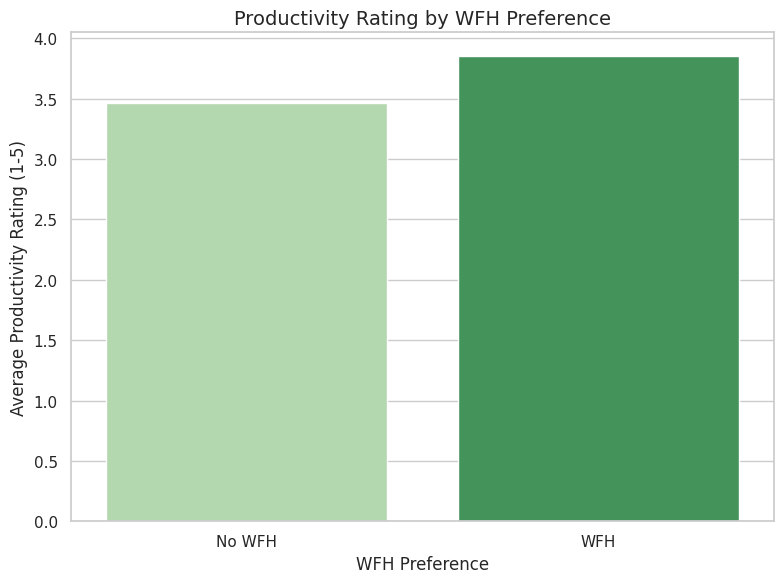

In [416]:
plt.figure(figsize=(8, 6))

# Calculate average productivity rating for each WFH preference group
mean_productive = df9.groupby("target_label")["rm_productive"].mean().reset_index()

sns.barplot(
    data=mean_productive,
    x="target_label",
    y="rm_productive",
    hue="target_label",
    palette="Greens",
    legend=False
)

plt.title("Productivity Rating by WFH Preference", fontsize=14)
plt.xlabel("WFH Preference", fontsize=12)
plt.ylabel("Average Productivity Rating (1-5)", fontsize=12)

plt.tight_layout()
plt.show()


Employees who prefer WFH report slightly higher productivity (≈3.9/5) compared to those who prefer working onsite (≈3.5/5).
This suggests that WFH may support better focus and efficiency for many individuals.
However, the difference is modest, indicating both groups generally maintain stable productivity levels.

Forecasting Work Arrangements



In [417]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Set the 'date' column as the index for df2
df2_ts = df2.set_index('date').copy()

# Ensure the index is a DatetimeIndex and set its frequency
df2_ts.index = pd.to_datetime(df2_ts.index)
df2_ts.index.freq = 'MS'

df2_ts.head()

,full_onsite_curr,hybrid_curr,full_remote_curr,full_onsite_curr_e,hybrid_curr_e,full_remote_curr_e,notes,license,citation
date,,,,,,,,,
2021-11-01,54.4,30.4,15.3,30.9,45.3,23.8,Unknown,"Copyright 2025 by Jose Maria Barrero, Nicholas...","When using this work, please cite: Barrero, Jo..."
2021-12-01,53.4,32.6,14.0,29.1,49.6,21.3,Unknown,Unknown,Unknown
2022-01-01,56.8,25.5,17.8,32.1,40.0,27.9,Unknown,Unknown,Unknown
2022-02-01,59.5,22.8,17.7,31.1,38.7,30.1,Unknown,Unknown,Unknown
2022-03-01,57.3,27.2,15.5,30.5,44.3,25.2,Unknown,Unknown,Unknown


WFH Trend using ARIMA

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

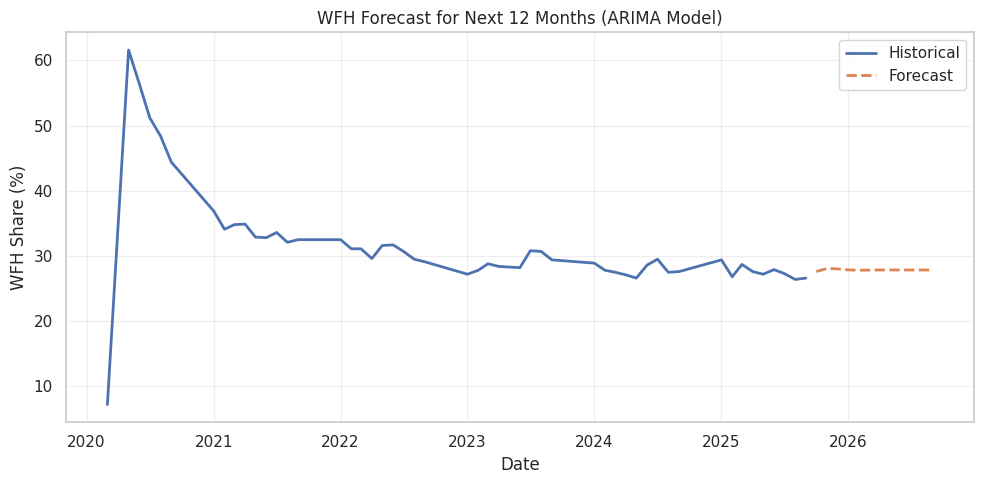

In [418]:
# C3 — Clean Forecasting WFH Trend using ARIMA (with proper future dates)

from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Use only df10 as the proper monthly WFH dataset
series = df10.set_index("date")["wfhcovid_matquestion"]

# Fit ARIMA model
model = ARIMA(series, order=(3,1,2))
model_fit = model.fit()

# Forecast
steps = 12
forecast = model_fit.forecast(steps=steps)

# ---- FIX: Create proper datetime index for the forecast ----
last_date = series.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1),
                             periods=steps, freq='MS')
forecast.index = future_dates

# ---- Plot clean & modern chart ----
plt.figure(figsize=(10, 5))

# Plot only recent historical data (not long-run back to 1970)
plt.plot(series.index, series, label="Historical", linewidth=2)

# Plot forecast
plt.plot(forecast.index, forecast, linestyle="--", label="Forecast", linewidth=2)

plt.title("WFH Forecast for Next 12 Months (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("WFH Share (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The ARIMA model predicts that WFH rates will stabilize over the next 12 months, remaining around 27–29%, with no major upward or downward shifts. This suggests that the post-COVID hybrid pattern has now settled into a long-term equilibrium, where remote work continues but does not grow significantly further. The trend confirms that WFH remains an important part of work culture, but employers are not expanding remote options beyond current levels.

Forecast for Full Remote and Hybrid

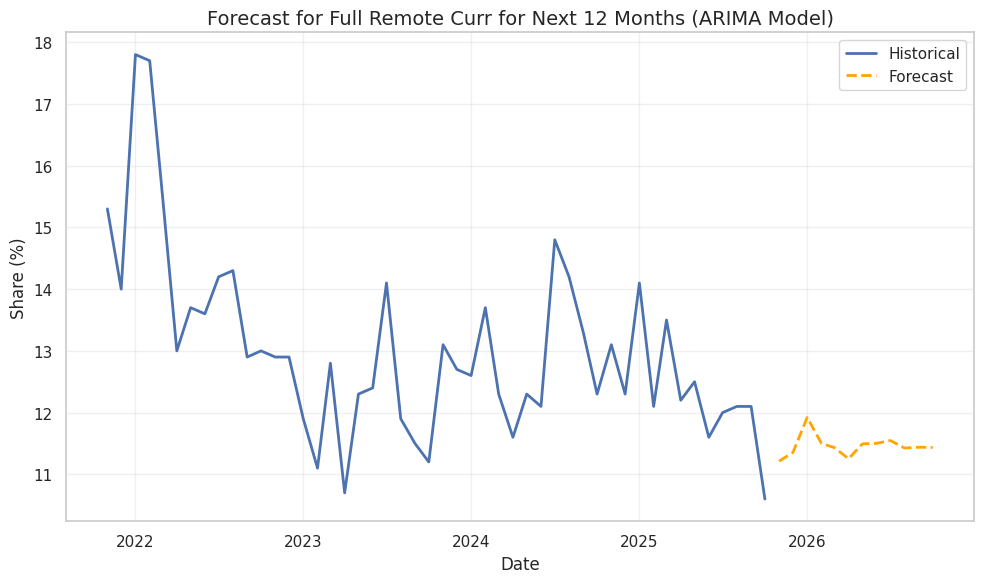

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



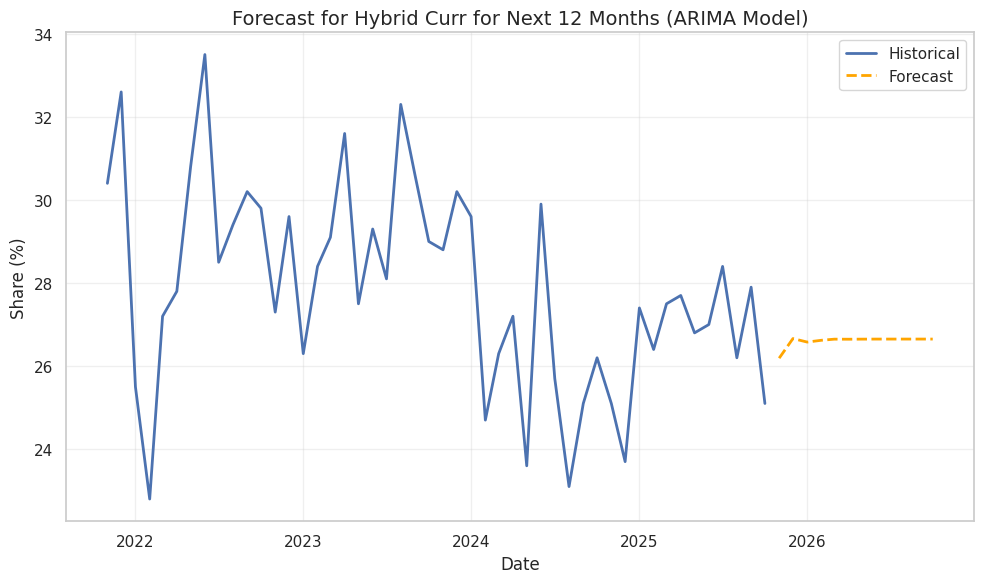

In [419]:
columns_to_forecast = ['full_remote_curr', 'hybrid_curr']

for col in columns_to_forecast:
    series = df2_ts[col]

    # Fit ARIMA model
    # Using order=(3,1,2) as a starting point as suggested in the instructions
    model = ARIMA(series, order=(3,1,2))
    model_fit = model.fit()

    # Forecast for the next 12 steps
    steps = 12
    forecast = model_fit.forecast(steps=steps)

    # Create proper DatetimeIndex for the forecast
    last_date = series.index[-1]
    future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1),
                                 periods=steps, freq='MS')
    forecast.index = future_dates

    # Plot historical data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(series.index, series, label="Historical", linewidth=2)
    plt.plot(forecast.index, forecast, linestyle="--", label="Forecast", linewidth=2, color='orange')

    plt.title(f"Forecast for {col.replace('_', ' ').title()} for Next 12 Months (ARIMA Model)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Share (%)", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

- Full Remote Forecast (ARIMA)

The forecast shows that full-remote work is expected to remain stable, fluctuating slightly around 11–12% over the next 12 months. This indicates that remote work adoption has likely plateaued, with no significant rise or decline predicted.

- Hybrid Work Forecast (ARIMA)

The hybrid work forecast suggests a slight upwards stabilization, with hybrid share expected to hover around 26–27%. This implies that hybrid work will likely remain the dominant flexible work model, maintaining steady adoption.